# Final Project

## Dataset : Music & Mental Health Survey Results


------------------------------------------------------------------------------------------------------
The dataset was extracted in kaggle, and the data collection was managed by Catherine Rasgaitis, through a form with generic questions regarding musical background and listening habits and mental health symptoms.

Columns:
- Timestamp - Date and time when form was submitted
- Age - Respondent's age 
- Primary streaming service - Respondent's primary streaming service
- Hours per day - Number of hours the respondent listens to music per day
- While working - Does the respondent listen to music while 
- Instrumentalist - Does the respondent play an instrument regularly?
- Composer - Does the respondent compose music?
- Fav genre - Respondent's favorite or top genre
- Exploratory - Does the respondent actively explore new artists/genres?
- Foreign languages - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- BPM - Beats per minute of favorite genre
- Frequency [Classical] - How frequently the respondent listens to classical music
- Frequency [Country] - How frequently the respondent listens to country music
- Frequency [EDM] - How frequently the respondent listens to EDM music
- Frequency [Folk] - How frequently the respondent listens to folks music
- Frequency [Gospel] - How frequently the respondent listens to Gospel music
- Frequency [Hip hop] - How frequently the respondent listens to hip hop music
- Frequency [Jazz] - How frequently the respondent listens to jazz music
- Frequency [K pop] - How frequently the respondent listens to K pop music
- Frequency [Latin] - How frequently the respondent listens to Latin music
- Frequency [Lofi] - How frequently the respondent listens to lofi music
- Frequency [Metal] - How frequently the respondent listens to metal music
- Frequency [Pop] - How frequently the respondent listens to pop music
- Frequency [R&B] - How frequently the respondent listens to R&B music
- Frequency [Rap] - How frequently the respondent listens to rap music
- Frequency [Rock] - How frequently the respondent listens to rock music
- Frequency [Video game music] - How frequently the respondent listens to video game music
- Anxiety - Self-reported anxiety, on a scale of 0-10
- Depression - Self-reported depression, on a scale of 0-10
- Insomnia - Self-reported insomnia, on a scale of 0-10
- OCD - Self-reported OCD, on a scale of 0-10
- Music effects - Does music improve/worsen respondent's mental health conditions?
- Permissions - Permissions to publicize data

kaggle link: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

-----------------------------------------------------------------------------------------------------

## Objective

--------------------------------------------------------------------------------------------------------
The goal here is to identify correlations between a person's music taste or relationship with music and its mental health. And additionaly to predict if an individuals music preference can influence their mental health status.

-------------------------------------------------------------------------------------------------------

### 1. Data Cleaning

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the 'Music & Mental Health Survey Results' dataset
df = pd.read_csv(r"C:\Users\mafal\Documents\ironhack\projects\project-music-and-mental-health-survey\archive\mxmh_survey_results.csv", encoding="latin1", sep= ",")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.shape

(736, 33)

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

##### 1.1 Cleaning NaNs

In [5]:
# Checking for nulls
null_counts = df.isnull().sum()
print(null_counts)

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

##### Age Column

In [6]:
df['Age'].unique()

array([18., 63., 61., 21., 19., nan, 17., 16., 15., 14., 20., 26., 23.,
       37., 36., 24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43.,
       28., 34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56.,
       59., 10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55.,
       48., 71., 74., 51., 65., 80., 50., 68., 46., 89.])

In [7]:
# Drop rows where 'Age' is NaN
df_cleaned = df.dropna(subset=['Age'])

In [8]:
df_cleaned['Age'].dtype

dtype('float64')

In [9]:
# Converting column Age from float to int
df_cleaned['Age'] = df_cleaned['Age'].astype(int)
df_cleaned['Age'].dtype

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\575864172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = df_cleaned['Age'].astype(int)


dtype('int32')

##### Primary streaming service Column

In [10]:
df_cleaned['Primary streaming service'].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service', nan], dtype=object)

In [11]:
# Define the list of accepted services
accepted_services = ['Spotify', 'Pandora', 'YouTube Music', 'Apple Music']

# Use .apply() to replace values
df_cleaned['Primary streaming service'] = df_cleaned['Primary streaming service'].apply(lambda x: x if x in accepted_services else 'Other')

# Check frequency for each value
df_cleaned['Primary streaming service'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\661986982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Primary streaming service'] = df_cleaned['Primary streaming service'].apply(lambda x: x if x in accepted_services else 'Other')


Primary streaming service
Spotify          457
Other            122
YouTube Music     94
Apple Music       51
Pandora           11
Name: count, dtype: int64

##### While working Column

In [12]:
df_cleaned['While working'].unique()

array(['Yes', 'No', nan], dtype=object)

In [13]:
# Replace NaN values in 'While working' column with 'No'
df_cleaned['While working'].fillna('No', inplace=True)

df_cleaned['While working'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\3096682811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['While working'].fillna('No', inplace=True)


While working
Yes    578
No     157
Name: count, dtype: int64

##### Instrumentalist Column

In [14]:
df_cleaned['Instrumentalist'].unique()

array(['Yes', 'No', nan], dtype=object)

In [15]:
# Replace NaN values in 'Instrumentalist' column with 'No'
df_cleaned['Instrumentalist'].fillna('No', inplace=True)

df_cleaned['Instrumentalist'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\3175493096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Instrumentalist'].fillna('No', inplace=True)


Instrumentalist
No     500
Yes    235
Name: count, dtype: int64

##### Composer Column

In [16]:
df_cleaned['Composer'].unique()

array(['Yes', 'No', nan], dtype=object)

In [17]:
# Replace NaN values in 'Composer' column with 'No'
df_cleaned['Composer'].fillna('No', inplace=True)

df_cleaned['Composer'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\2430703653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Composer'].fillna('No', inplace=True)


Composer
No     609
Yes    126
Name: count, dtype: int64

##### Foreign languages Column

In [18]:
df_cleaned['Foreign languages'].unique()

array(['Yes', 'No', nan], dtype=object)

In [19]:
# Replace NaN values in 'Foreign languages' column with 'No'
df_cleaned['Foreign languages'].fillna('No', inplace=True)

df_cleaned['Foreign languages'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\2328872808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Foreign languages'].fillna('No', inplace=True)


Foreign languages
Yes    403
No     332
Name: count, dtype: int64

##### Music effects Column

In [20]:
df_cleaned['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [21]:
# Replace NaN values in 'Foreign languages' column with 'No'
df_cleaned['Music effects'].fillna('No effect', inplace=True)

df_cleaned['Music effects'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\3333509596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Music effects'].fillna('No effect', inplace=True)


Music effects
Improve      541
No effect    177
Worsen        17
Name: count, dtype: int64

##### BPM Column

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
BPM stands for “beats per minute,” which is your heart rate.

Since BPM depends on various factors such age and activity level, we'll be  imputing missing values using age-group means or medians:

- Mean: Suitable for data without many outliers.
- Median: Better choice for data with outliers, as it is less sensitive to them.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
df_cleaned['BPM']#.unique()

0      156.0
1      119.0
2      132.0
3       84.0
4      107.0
       ...  
731    120.0
732    160.0
733    120.0
734    170.0
735     98.0
Name: BPM, Length: 735, dtype: float64

In [23]:
df_cleaned['BPM'].dtype

dtype('float64')

###### BPM - Visualizing the Distribution

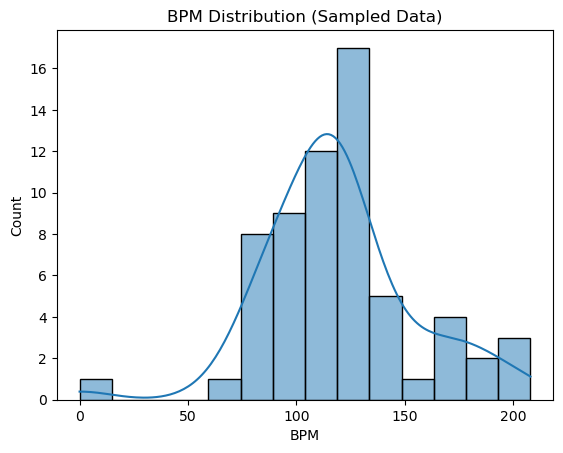

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sample = df_cleaned['BPM'].dropna().sample(frac=0.1)  # Adjust `frac` as needed
sns.histplot(sample, kde=True)
plt.title('BPM Distribution (Sampled Data)')
plt.show()

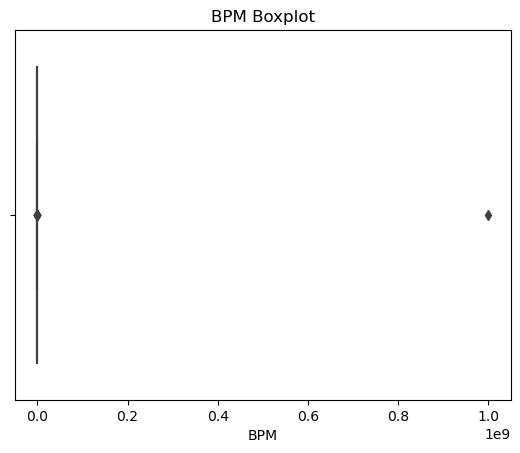

In [25]:
# Boxplot
sns.boxplot(x=df_cleaned['BPM'])
plt.title('BPM Boxplot')
plt.show()

###### BPM - Statistical Method to Identify Outliers

In [26]:
Q1 = df_cleaned['BPM'].quantile(0.25)
Q3 = df_cleaned['BPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df_cleaned[(df_cleaned['BPM'] < lower_bound) | (df_cleaned['BPM'] > upper_bound)]
print(f"Outliers count: {len(outliers_df)}")

Outliers count: 11


###### BPM - Filling NaN Values

------------------------------------------------------------------------------------------------------------------------------------------------------
Based on the observed distribution and the presence of outliers:

- Use Median: If your data contains significant outliers or is not normally distributed, the median is more robust and representative of central tendency without being skewed by outliers.
- Use Mean: If data is approximately normally distributed without significant outliers, the mean can accurately represent your data's central tendency.

------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
# Decision based on distribution analysis and outlier presence
if len(outliers_df) > 0:
    df_cleaned['BPM'] = df_cleaned.groupby('Age')['BPM'].transform(lambda x: x.fillna(x.median()))
else:
    df_cleaned['BPM'] = df_cleaned.groupby('Age')['BPM'].transform(lambda x: x.fillna(x.mean()))

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\874247583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['BPM'] = df_cleaned.groupby('Age')['BPM'].transform(lambda x: x.fillna(x.median()))


In [28]:
df_cleaned['BPM'].isna().sum()

3

In [29]:
df_cleaned.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             3
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [30]:
# Display rows where 'BPM' is NaN
df_cleaned[df_cleaned['BPM'].isna()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
390,8/29/2022 18:56:27,54,Other,6.00,Yes,No,No,Classical,No,No,...,Sometimes,Rarely,Rarely,Never,2.0,2.0,3.0,2.0,Improve,I understand.
464,9/1/2022 15:36:18,54,YouTube Music,10.00,Yes,No,No,Rock,Yes,No,...,Sometimes,Never,Sometimes,Never,2.0,1.0,2.0,2.0,Improve,I understand.
490,9/1/2022 19:44:33,71,Other,0.25,Yes,No,No,Gospel,No,Yes,...,Rarely,Never,Rarely,Never,1.0,0.0,0.0,0.0,Improve,I understand.


In [31]:
# Display rows for the individuals with 54
df_cleaned[df_cleaned['Age']==54]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
390,8/29/2022 18:56:27,54,Other,6.0,Yes,No,No,Classical,No,No,...,Sometimes,Rarely,Rarely,Never,2.0,2.0,3.0,2.0,Improve,I understand.
464,9/1/2022 15:36:18,54,YouTube Music,10.0,Yes,No,No,Rock,Yes,No,...,Sometimes,Never,Sometimes,Never,2.0,1.0,2.0,2.0,Improve,I understand.


In [32]:
# Display rows for the individuals with 54
df_cleaned[df_cleaned['Age']==71]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
490,9/1/2022 19:44:33,71,Other,0.25,Yes,No,No,Gospel,No,Yes,...,Rarely,Never,Rarely,Never,1.0,0.0,0.0,0.0,Improve,I understand.


In [33]:
# Display rows for the individuals with 54
df_cleaned[(df_cleaned['Age'] < 55) & (df_cleaned['Age'] >= 50)][['Age', 'BPM']]

,Age,BPM
143,53,92.0
237,53,92.0
390,54,NaN
464,54,NaN
512,51,180.0
537,50,98.0
570,53,153.0


In [34]:
# Display rows for the individuals with 54
df_cleaned[(df_cleaned['Age'] < 75) & (df_cleaned['Age'] >= 70)][['Age', 'BPM']]

,Age,BPM
428,72,77.0
429,73,4.0
476,70,88.0
490,71,NaN
494,74,129.0


------------------------------------------------------------------------------------------------------------------------
Because people with 54 and 60 have no registration of BPM, we'll be replacing with the median of their group of age:
- 54: median of ages between 50 and 54
- 71: median of ages between 70 and 75

-------------------------------------------------------------------------------------------------------------------------


In [35]:

# Step 1: Calculate the median BPM of the subset (ages > 50 and < 54)
median_bpm = df_cleaned[(df_cleaned['Age'] > 50) & (df_cleaned['Age'] < 54)]['BPM'].median()

# Step 2: Replace the BPM values of 54-year-old individuals with the median BPM
df_cleaned.loc[df_cleaned['Age'] == 54, 'BPM'] = median_bpm

In [36]:
# Step 1: Calculate the median BPM of the subset (ages > 50 and < 54)
median_bpm = df_cleaned[(df_cleaned['Age'] > 70) & (df_cleaned['Age'] < 75)]['BPM'].median()

# Step 2: Replace the BPM values of 54-year-old individuals with the median BPM
df_cleaned.loc[df_cleaned['Age'] == 71, 'BPM'] = median_bpm

In [37]:
# Display rows for the individuals with 54
df_cleaned[(df_cleaned['Age'] == 54) | (df_cleaned['Age'] == 71)][['Age', 'BPM']]

,Age,BPM
390,54,122.5
464,54,122.5
490,71,77.0


##### 1.2 Renaming columns

In [38]:
import re

# Function to apply custom naming pattern
def custom_rename(column_name):
    # Convert to lowercase and replace spaces with underscores for all names
    new_name = column_name.lower().replace(' ', '_')
    
    # Apply regular expression for 'frequency_[genre]' renaming
    new_name = re.sub(r'frequency_\[(.*?)\]', r'freq_\1', new_name)
    
    return new_name

# Apply the custom_rename function to each column name
df_cleaned.columns = [custom_rename(col) for col in df_cleaned.columns]

df_cleaned.columns

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'freq_classical',
       'freq_country', 'freq_edm', 'freq_folk', 'freq_gospel', 'freq_hip_hop',
       'freq_jazz', 'freq_k_pop', 'freq_latin', 'freq_lofi', 'freq_metal',
       'freq_pop', 'freq_r&b', 'freq_rap', 'freq_rock',
       'freq_video_game_music', 'anxiety', 'depression', 'insomnia', 'ocd',
       'music_effects', 'permissions'],
      dtype='object')

##### 1.3 Checking for Outliers

In [39]:
# Select columns with numerical data types
numerical_df = df_cleaned.select_dtypes(include=['int32', 'int64', 'float64'])

# Now you have a DataFrame `numerical_df` with only numerical columns
# To get just the names of these columns
numerical_cols = numerical_df.columns.tolist()
print(numerical_cols)

['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia', 'ocd']


In [40]:
# Dictionary to store outlier indices for each numerical column
outliers_indices = {}

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get indices of outliers
    outliers_mask = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
    outliers_indices[col] = df_cleaned.loc[outliers_mask].index

outliers_indices

{'age': Index([  1,   3, 143, 162, 170, 203, 229, 237, 305, 310, 324, 376, 390, 401,
        404, 410, 415, 428, 429, 453, 456, 464, 470, 473, 474, 475, 476, 477,
        480, 483, 485, 486, 490, 491, 494, 508, 510, 512, 513, 514, 518, 522,
        523, 527, 529, 532, 533, 537, 539, 567, 570, 582, 591, 603, 610, 624,
        635, 695, 703],
       dtype='int64'),
 'hours_per_day': Index([ 17,  18,  26,  53,  77,  95, 125, 142, 164, 223, 257, 280, 290, 320,
        336, 341, 347, 357, 359, 366, 407, 417, 420, 426, 464, 465, 466, 485,
        586, 587, 589, 598, 611, 638, 655, 659, 672, 673, 695, 726],
       dtype='int64'),
 'bpm': Index([ 97, 124, 157, 164, 229, 248, 296, 309, 339, 353, 370, 372, 376, 417,
        421, 429, 498, 514, 524, 564, 567, 568, 610, 639, 644, 662, 711],
       dtype='int64'),
 'anxiety': Index([], dtype='int64'),
 'depression': Index([], dtype='int64'),
 'insomnia': Index([], dtype='int64'),
 'ocd': Index([], dtype='int64')}

------------------------------------------------------------------------------------------------------------------------------------------------
"The lowest resting heart beat on record is 27 bpm belonging to Martin Brady (UK, b. 24 March 1969) who was tested at the Guernsey Chest and Heart Unit, Channel Islands on 11 August 2005."

- https://www.guinnessworldrecords.com/world-records/lowest-heart-rate

------------------------------------------------------------------------------------------------------------------------------------------------

"Doctors consider a low heart rate to be 60 beats per minute (bpm) and below. In fact, if you have bradycardia, you’ll have a low resting heart rate below 60, even when you’re awake and active. In contrast, a normal range is 60 to 100 bpm while awake.

It’s very possible to have a slow heart rate and experience no symptoms. However, if you have symptoms but ignore them, it can sometimes cause more serious problems.

- https://health.clevelandclinic.org/is-a-slow-heart-rate-good-or-bad-for-you

-------------------------------------------------------------------------------------------------------------------------------------------------

In [41]:
# Calculate the minimum value of the 'bpm' column
min_bpm = df_cleaned['bpm'].min()

print(f"The minimum bpm value is: {min_bpm}")

The minimum bpm value is: 0.0


In [42]:
df_cleaned[df_cleaned['bpm'] < 60][['age', 'bpm', 'fav_genre']]

,age,bpm,fav_genre
58,23,55.0,Folk
214,19,52.0,Rock
339,35,0.0,Folk
372,18,20.0,Hip hop
421,14,40.0,Classical
427,31,55.0,Classical
429,73,4.0,R&B
524,28,0.0,Metal
567,68,8.0,Gospel
594,18,56.0,Gospel


-----------------------------------------------------------------------------------
For accuracy we'll be replacing the above bpm's with 60 bpm.

-----------------------------------------------------------------------------------

In [43]:
# Replacing the 11 outliers bpm 
df_cleaned.loc[df_cleaned['bpm'] < 60, 'bpm'] = 60

df_cleaned[df_cleaned['bpm'] < 60][['age', 'bpm', 'fav_genre']]

,age,bpm,fav_genre


In [44]:
df_cleaned[df_cleaned['bpm'] == 60][['age', 'bpm', 'fav_genre']]

,age,bpm,fav_genre
58,23,60.0,Folk
158,41,60.0,Pop
214,19,60.0,Rock
277,20,60.0,Video game music
339,35,60.0,Folk
372,18,60.0,Hip hop
421,14,60.0,Classical
427,31,60.0,Classical
429,73,60.0,R&B
524,28,60.0,Metal


In [45]:
# Select columns with object data types
categorical_df = df_cleaned.select_dtypes(include=['object'])

# Now you have a DataFrame `numerical_df` with only numerical columns
# To get just the names of these columns
categorical_cols = categorical_df.columns.tolist()
print(categorical_cols)

['timestamp', 'primary_streaming_service', 'while_working', 'instrumentalist', 'composer', 'fav_genre', 'exploratory', 'foreign_languages', 'freq_classical', 'freq_country', 'freq_edm', 'freq_folk', 'freq_gospel', 'freq_hip_hop', 'freq_jazz', 'freq_k_pop', 'freq_latin', 'freq_lofi', 'freq_metal', 'freq_pop', 'freq_r&b', 'freq_rap', 'freq_rock', 'freq_video_game_music', 'music_effects', 'permissions']


In [46]:
# Analysing the frequency of each category for each categorical column
for col in categorical_cols:
    category_counts = df_cleaned[col].value_counts()
    print(category_counts)
    print()

timestamp
8/28/2022 16:15:08    2
8/27/2022 19:29:02    1
9/1/2022 21:14:09     1
9/1/2022 19:36:54     1
9/1/2022 19:39:07     1
                     ..
8/28/2022 23:34:37    1
8/28/2022 23:40:54    1
8/28/2022 23:42:24    1
8/28/2022 23:47:13    1
11/9/2022 1:55:20     1
Name: count, Length: 734, dtype: int64

primary_streaming_service
Spotify          457
Other            122
YouTube Music     94
Apple Music       51
Pandora           11
Name: count, dtype: int64

while_working
Yes    578
No     157
Name: count, dtype: int64

instrumentalist
No     500
Yes    235
Name: count, dtype: int64

composer
No     609
Yes    126
Name: count, dtype: int64

fav_genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              34
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                

-------------------------------------------------------------------------------------------------------------
Since timestamp is only the Date and time when form was submitted, we'll be dropping it as it is not relevant for our analysis.

-----------------------------------------------------------------------------------------------------------

In [47]:
# Dropping the 'timestamp' column in place
df_cleaned.drop('timestamp', axis=1, inplace=True)
df_cleaned

C:\Users\mafal\AppData\Local\Temp\ipykernel_22304\2402361468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('timestamp', axis=1, inplace=True)


,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_r&b,freq_rap,freq_rock,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects,permissions
0,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect,I understand.
1,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect,I understand.
2,18,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,19,Other,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


### 2. Descriptive Statistics

In [48]:
df_cleaned.describe

<bound method NDFrame.describe of      age primary_streaming_service  hours_per_day while_working  \
0     18                   Spotify            3.0           Yes   
1     63                   Pandora            1.5           Yes   
2     18                   Spotify            4.0            No   
3     61             YouTube Music            2.5           Yes   
4     18                   Spotify            4.0           Yes   
..   ...                       ...            ...           ...   
731   17                   Spotify            2.0           Yes   
732   18                   Spotify            1.0           Yes   
733   19                     Other            6.0           Yes   
734   19                   Spotify            5.0           Yes   
735   29             YouTube Music            2.0           Yes   

    instrumentalist composer         fav_genre exploratory foreign_languages  \
0               Yes      Yes             Latin         Yes               Yes   
1

###### Mean

In [49]:
# Calculating the mean or average of each numerical column
means = numerical_df.mean()
print("Means:\n", means)

Means:
 age              2.520680e+01
hours_per_day    3.573537e+00
bpm              1.360667e+06
anxiety          5.833333e+00
depression       4.798639e+00
insomnia         3.740816e+00
ocd              2.631293e+00
dtype: float64


###### Median

In [50]:
# Calculating the median, or the middle value of each numerical column
medians = numerical_df.median()
print("Medians:\n", medians)

Medians:
 age               21.0
hours_per_day      3.0
bpm              120.0
anxiety            6.0
depression         5.0
insomnia           3.0
ocd                2.0
dtype: float64


###### Mode

In [51]:
# Calculating the mode, or the most frequently occurring value in each column. Note that a column can have more than one mode
modes = df_cleaned.mode()
print("Modes:\n", modes)

Modes:
    age primary_streaming_service  hours_per_day while_working instrumentalist  \
0   18                   Spotify            2.0           Yes              No   

  composer fav_genre exploratory foreign_languages    bpm  ... freq_r&b  \
0       No      Rock         Yes               Yes  120.0  ...    Never   

  freq_rap        freq_rock freq_video_game_music anxiety depression insomnia  \
0   Rarely  Very frequently                 Never     7.0        7.0      0.0   

   ocd music_effects    permissions  
0  0.0       Improve  I understand.  

[1 rows x 32 columns]


###### Range

In [52]:
# Calculating the range, or the difference between the maximum and minimum values in each numerical column
ranges = numerical_df.max() - numerical_df.min()
print("Ranges:\n", ranges)

Ranges:
 age                     79.0
hours_per_day           24.0
bpm              999999999.0
anxiety                 10.0
depression              10.0
insomnia                10.0
ocd                     10.0
dtype: float64


###### Standard Deviation

In [53]:
# Calculating the standard deviation, a measure of the amount of variation or dispersion of a set of values
std_devs = numerical_df.std()
print("Standard Deviations:\n", std_devs)

Standard Deviations:
 age              1.205497e+01
hours_per_day    3.030187e+00
bpm              3.688555e+07
anxiety          2.792515e+00
depression       3.030206e+00
insomnia         3.090126e+00
ocd              2.839383e+00
dtype: float64


###### Distribution of Variables

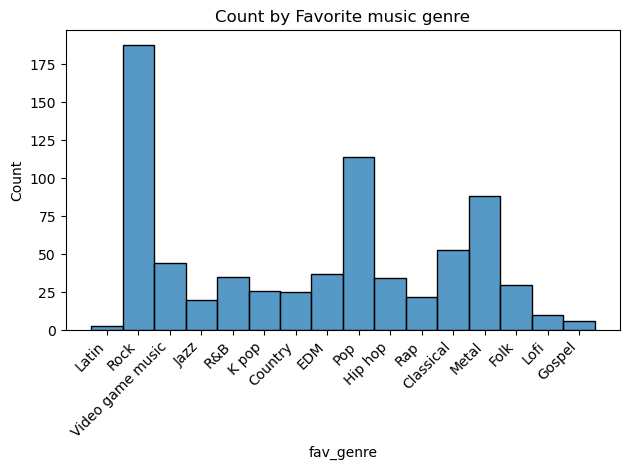

In [54]:
# Histogram for counting the total for each favorite genre
sns.histplot(df_cleaned['fav_genre'])
plt.title('Count by Favorite music genre')

# Rotate x-axis labels to be diagonal (45 degrees)
plt.xticks(rotation=45, ha='right')  # 'ha' aligns the labels right-justified at their center
plt.tight_layout()  # This ensures that the labels (and other figure elements) fit well into the figure area
plt.show()

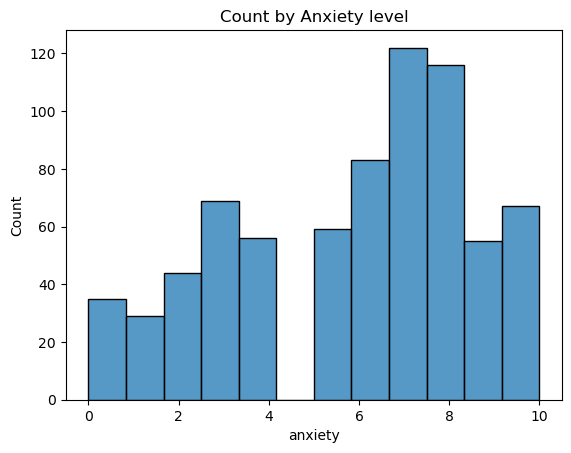

In [55]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['anxiety'])
plt.title('Count by Anxiety level')
plt.show()

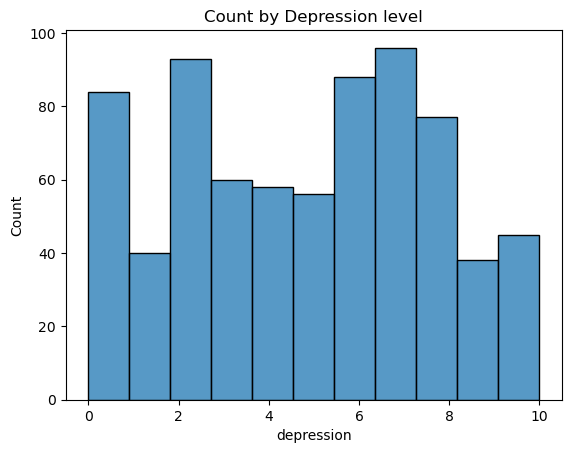

In [56]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['depression'])
plt.title('Count by Depression level')
plt.show()

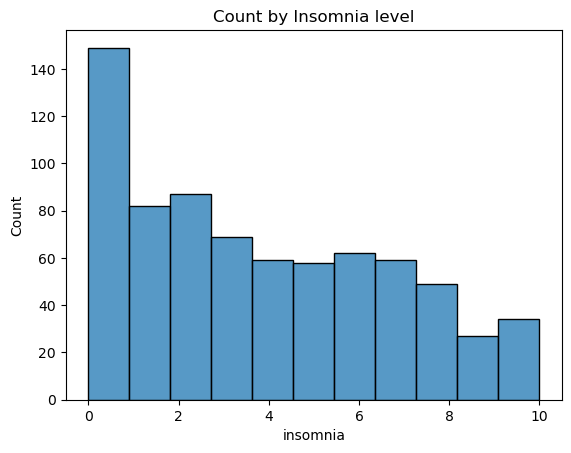

In [57]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['insomnia'])
plt.title('Count by Insomnia level')
plt.show()

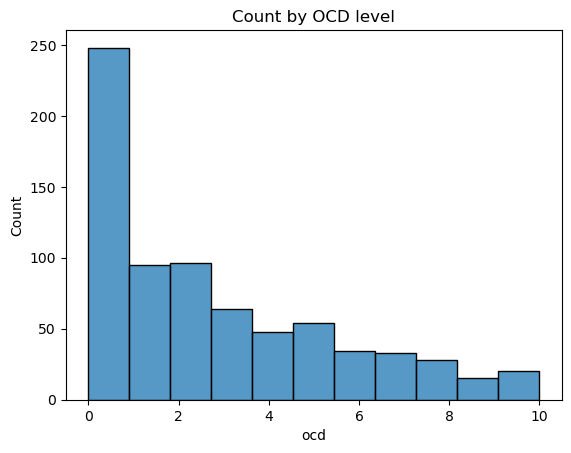

In [58]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['ocd'])
plt.title('Count by OCD level')
plt.show()

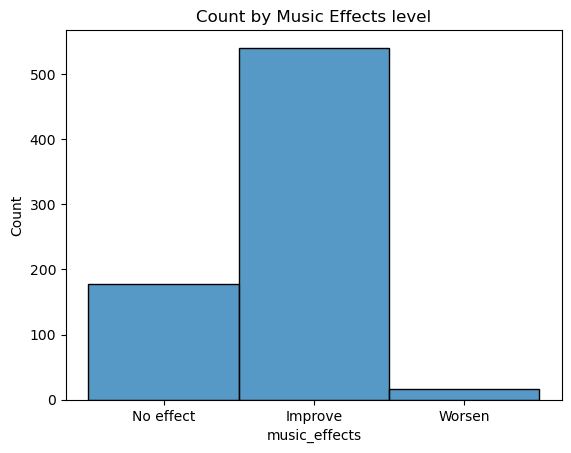

In [59]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['music_effects'])
plt.title('Count by Music Effects level')
plt.show()

In [60]:
# Saving the column names for freq_<music_genre> columns
freq_columns = [col for col in df_cleaned.columns if col.startswith('freq')]

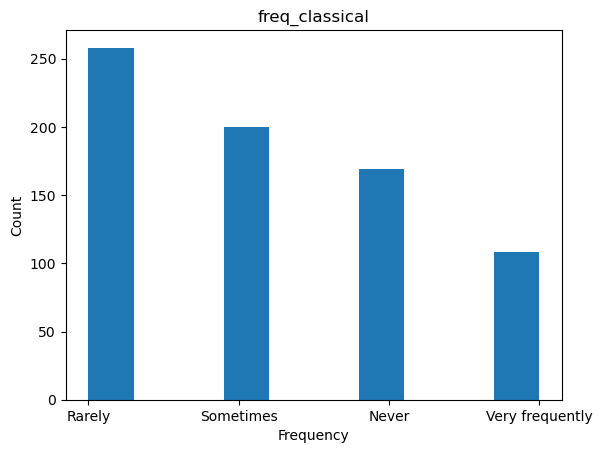

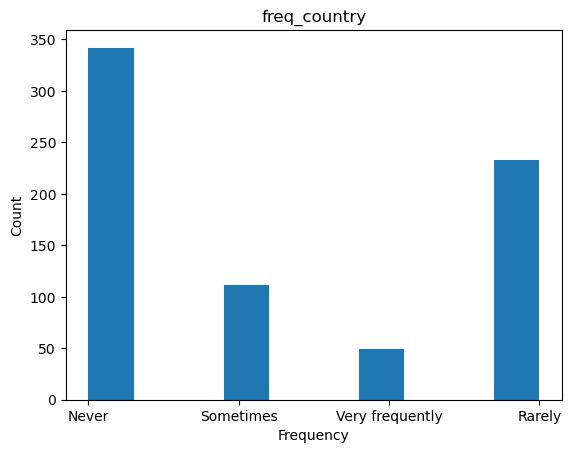

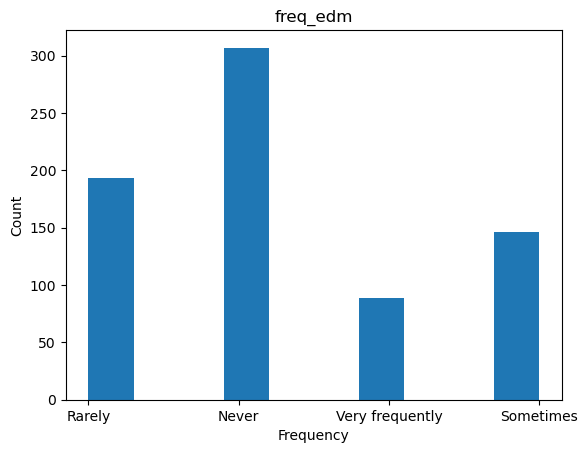

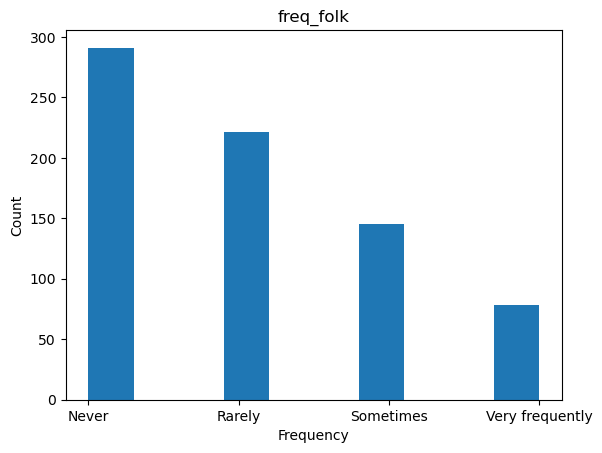

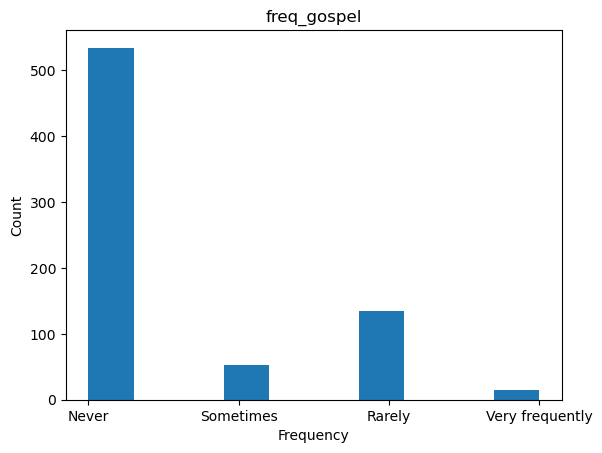

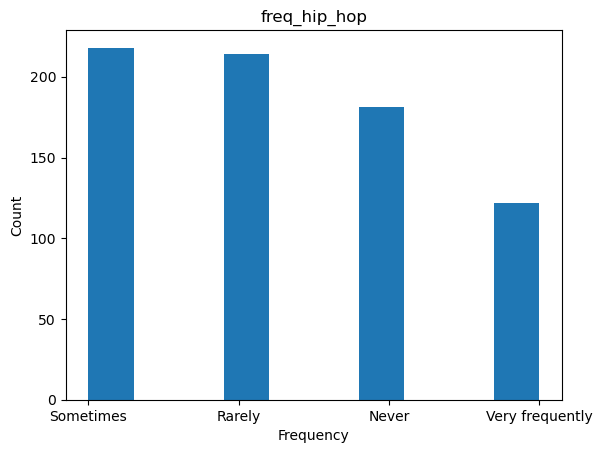

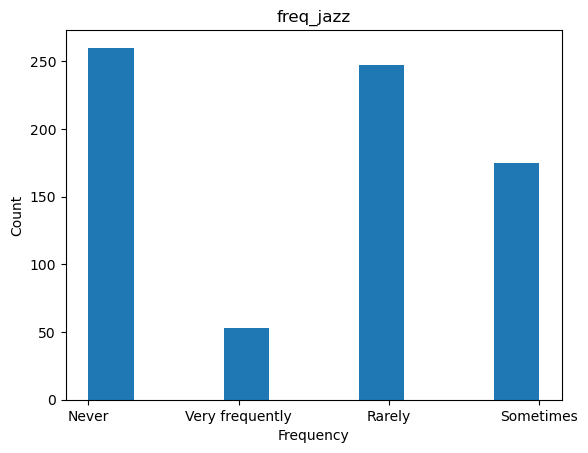

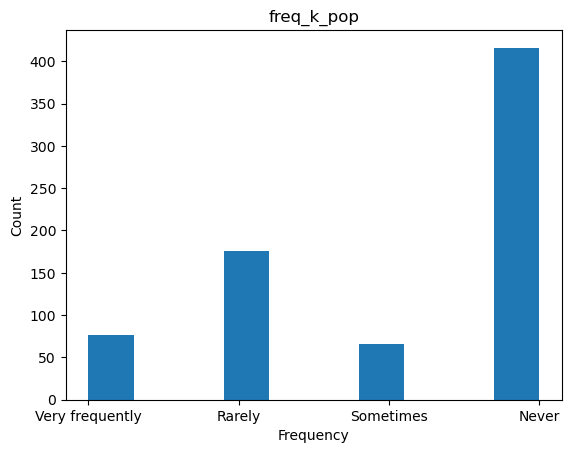

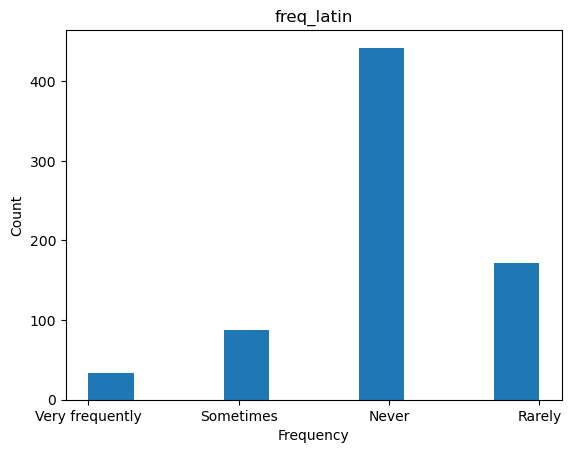

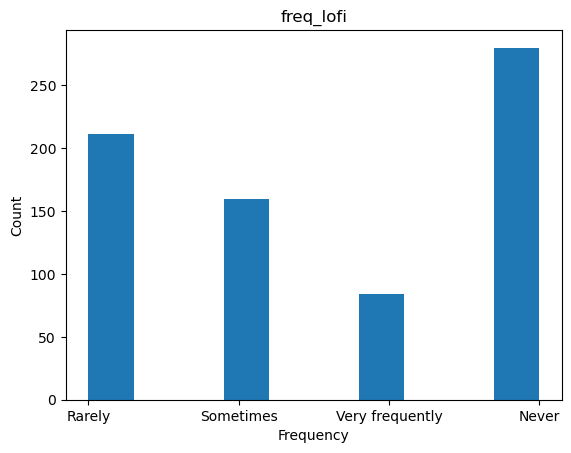

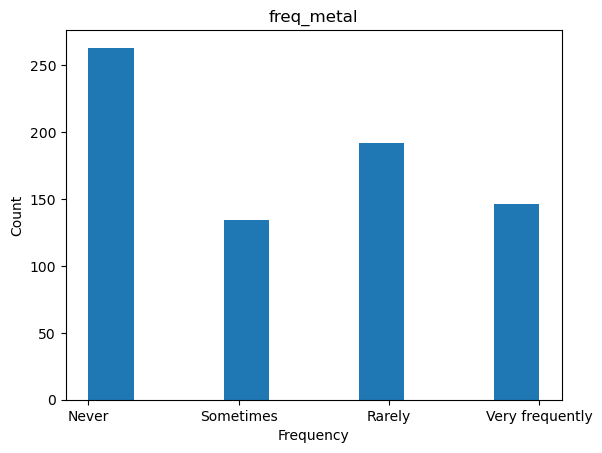

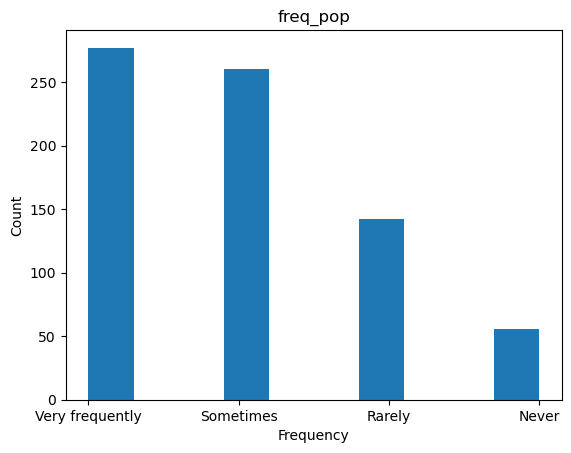

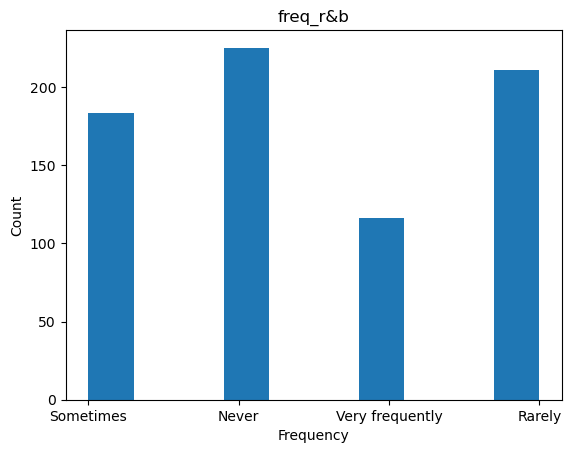

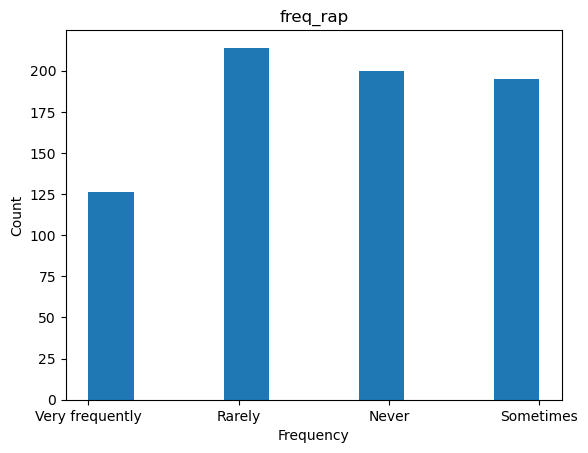

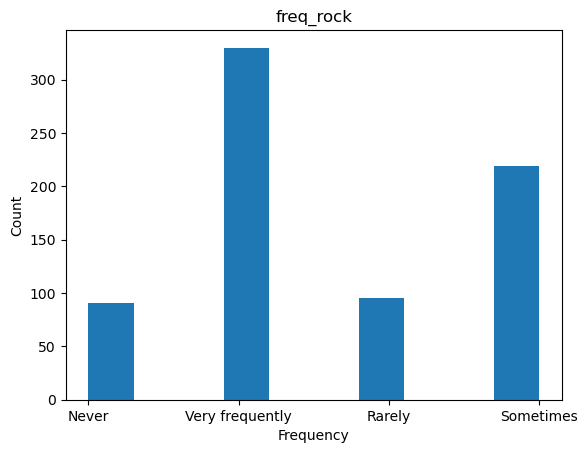

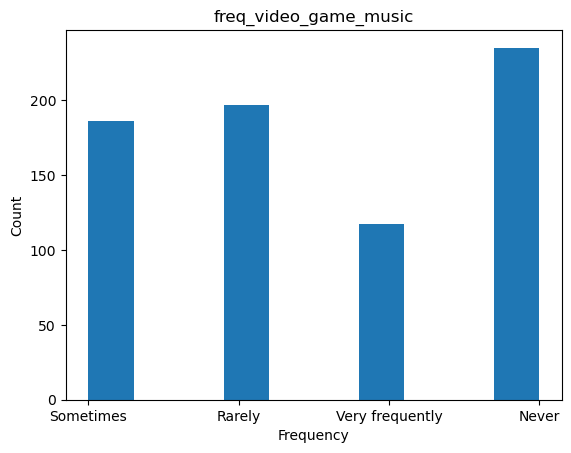

In [61]:
# Plotting each freq_<music_genre> column
for col in freq_columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df_cleaned[col])  # Plot histogram
    plt.title(col)  # Set title to column name
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.show()

### 3. Explore Music Preferences

In [62]:
# Identify music preference columns (e.g., those starting with 'freq_')
music_pref_columns = [col for col in df_cleaned.columns if col.startswith('freq_')]

# Identifying mental health score columns 
mental_health_columns = ['depression', 'insomnia', 'ocd', 'anxiety']

In [63]:
# Melt the DataFrame to long format for music preferences
melted_df = pd.melt(df_cleaned, id_vars=mental_health_columns, value_vars=music_pref_columns, 
                    var_name='music_preference', value_name='preference_score')

In [64]:
# You can group by 'music_preference' directly since the goal is to relate mental health scores to music categories
aggregated_scores = melted_df.groupby('music_preference')[mental_health_columns].mean().reset_index()

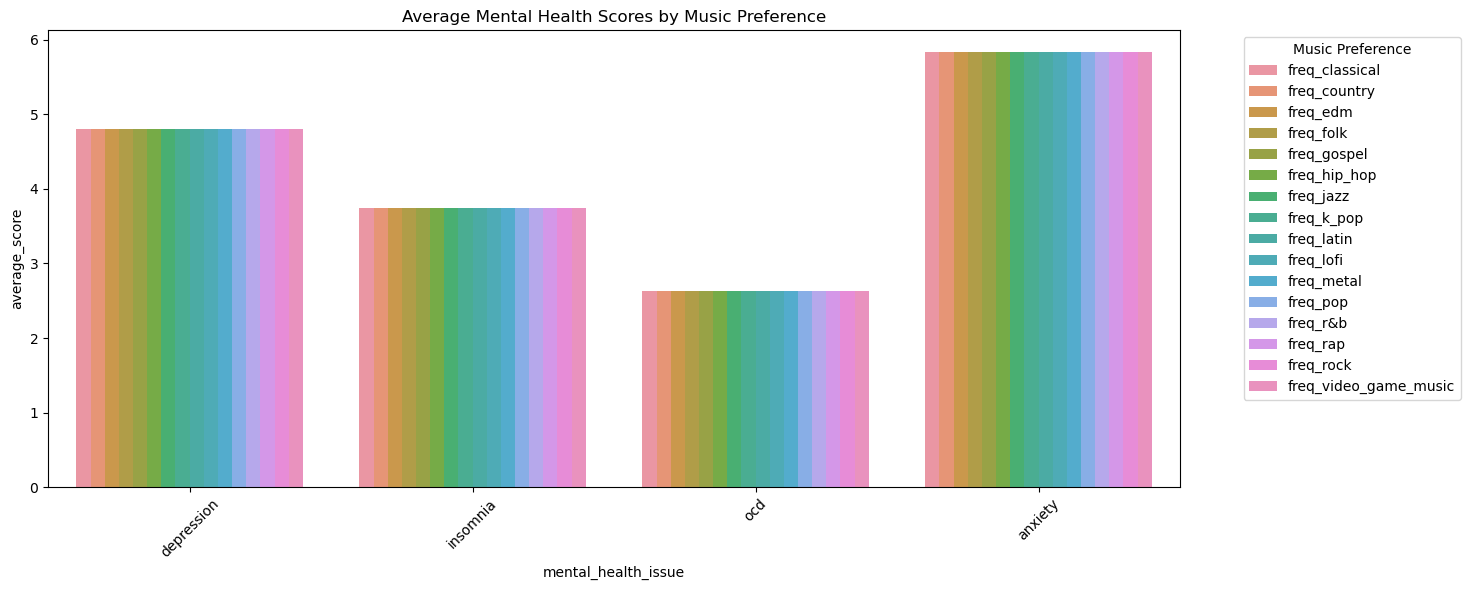

In [65]:
# Pivot for visualization: music preferences in different colors, mental health issues on the x-axis
plot_data = pd.melt(aggregated_scores, id_vars=['music_preference'], 
                    var_name='mental_health_issue', value_name='average_score')

plt.figure(figsize=(12, 6))
sns.barplot(x='mental_health_issue', y='average_score', hue='music_preference', data=plot_data)
plt.title('Average Mental Health Scores by Music Preference')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.legend(title='Music Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

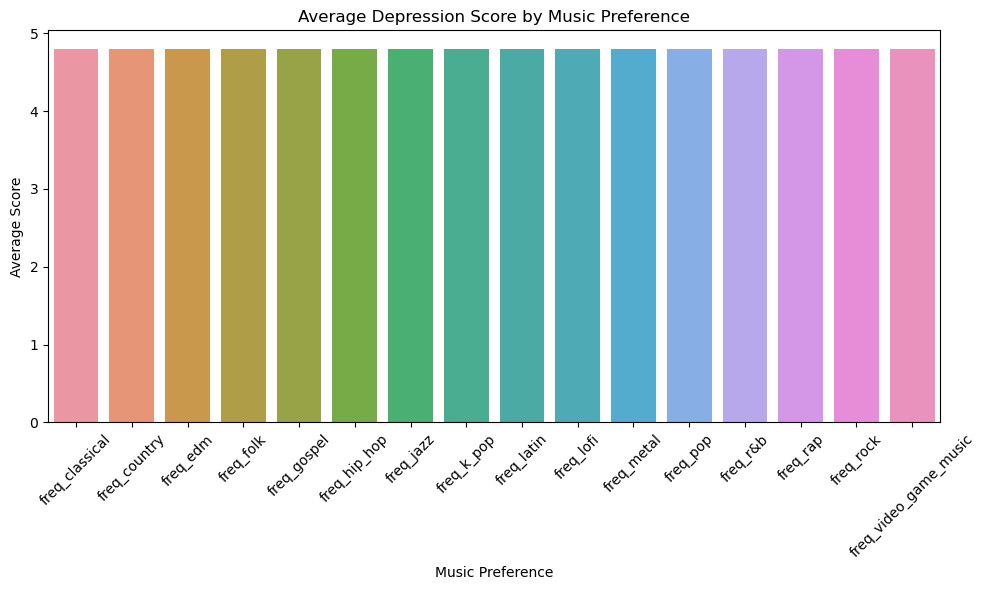

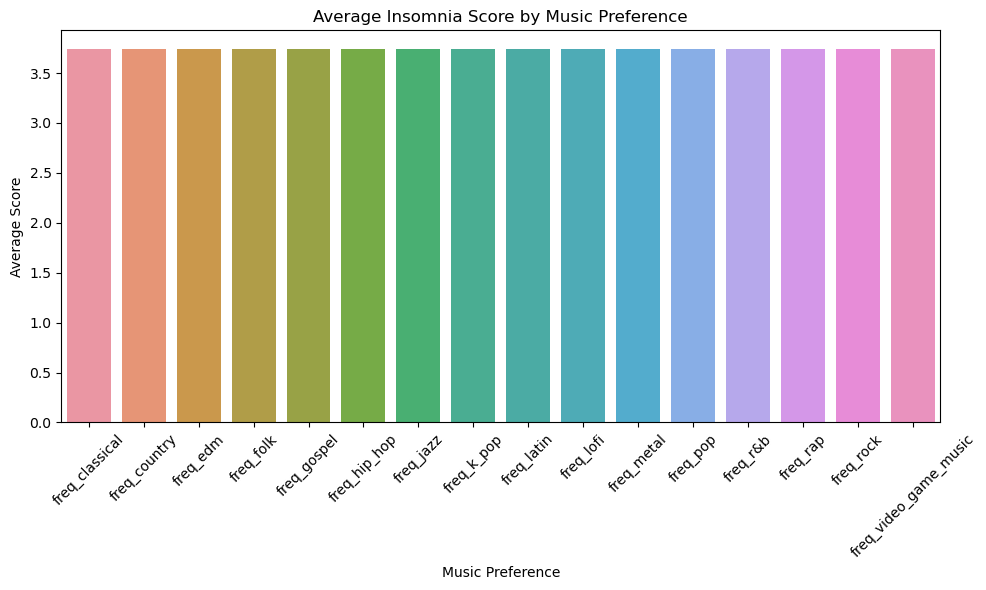

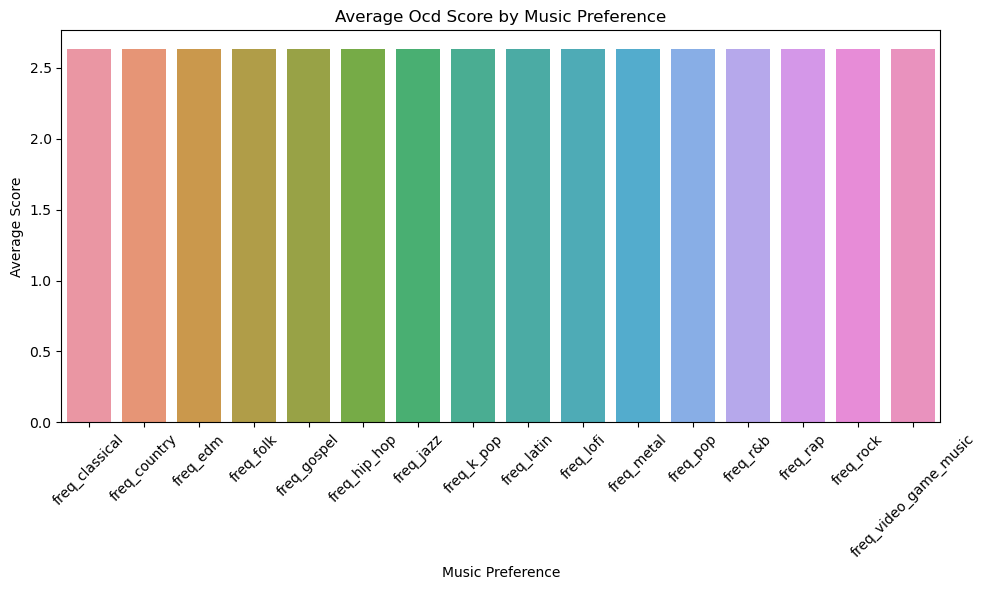

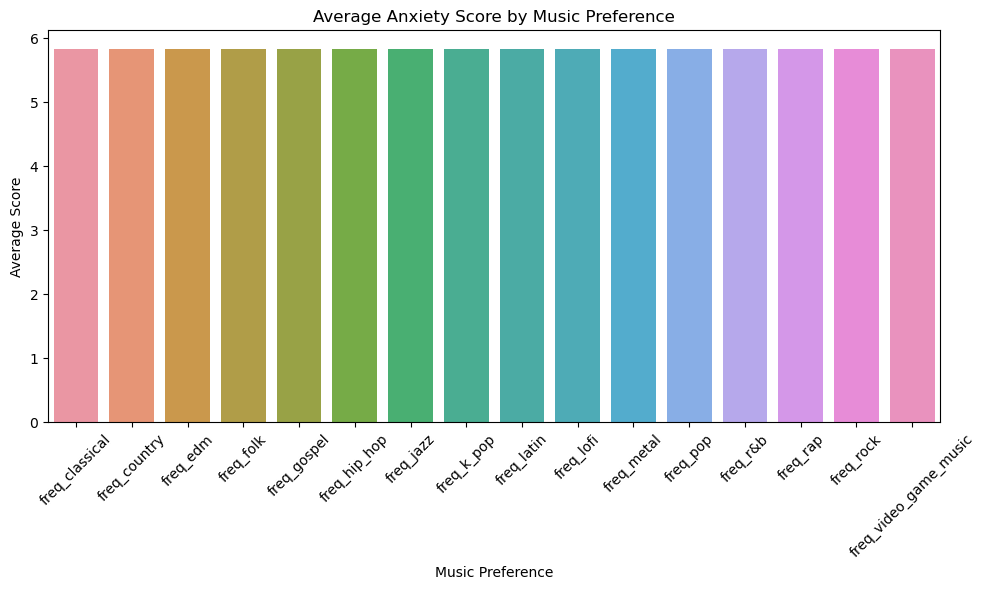

In [66]:
# Plotting for each mental health issue
for issue in mental_health_columns:
    plt.figure(figsize=(10, 6))  # Adjust size as needed
    sns.barplot(x='music_preference', y=issue, data=aggregated_scores)
    plt.xticks(rotation=45)
    plt.xlabel('Music Preference')
    plt.ylabel('Average Score')
    plt.title(f'Average {issue.capitalize()} Score by Music Preference')
    plt.tight_layout()  # Adjust layout
    plt.show()

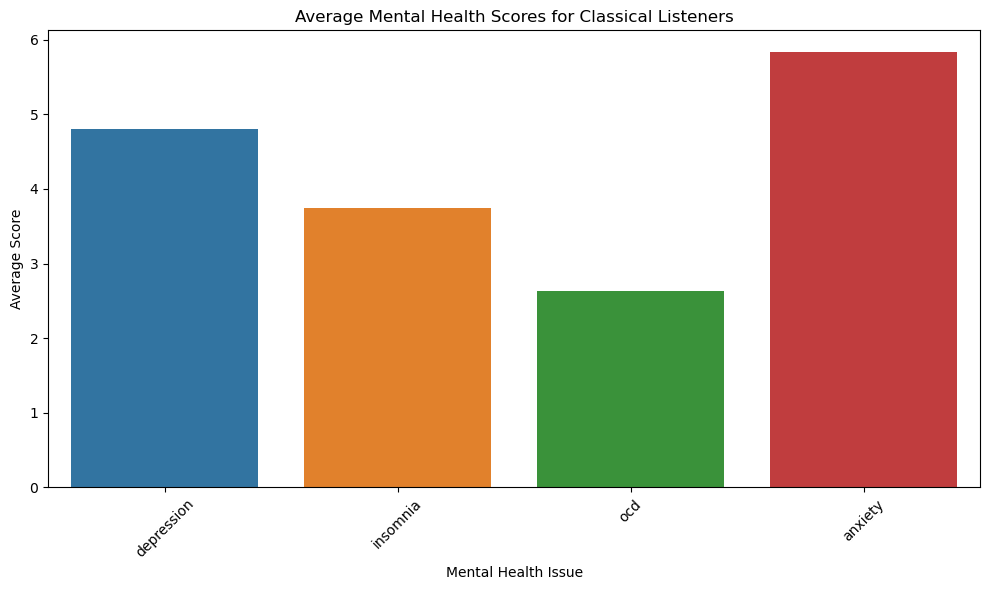

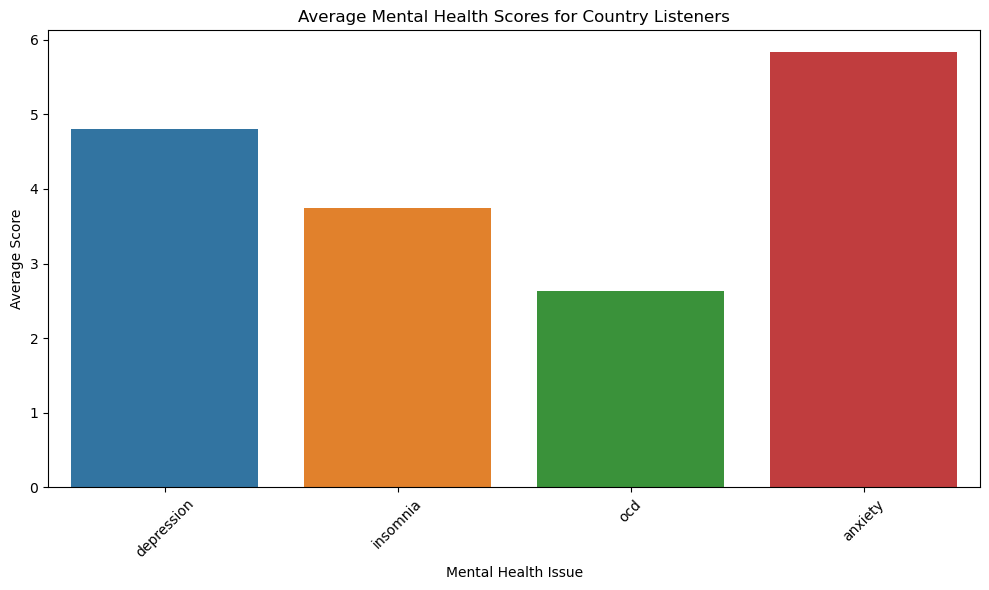

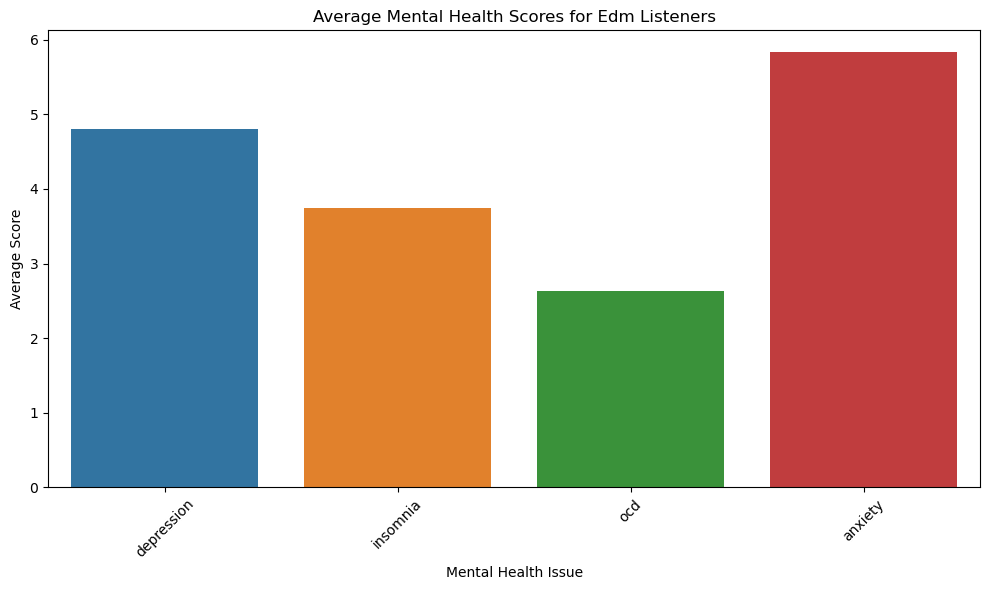

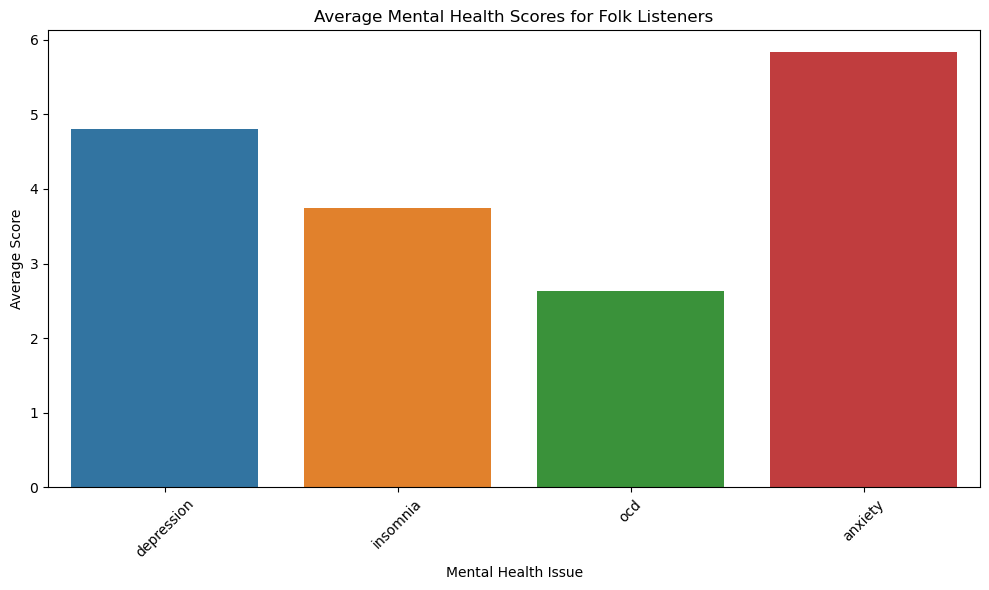

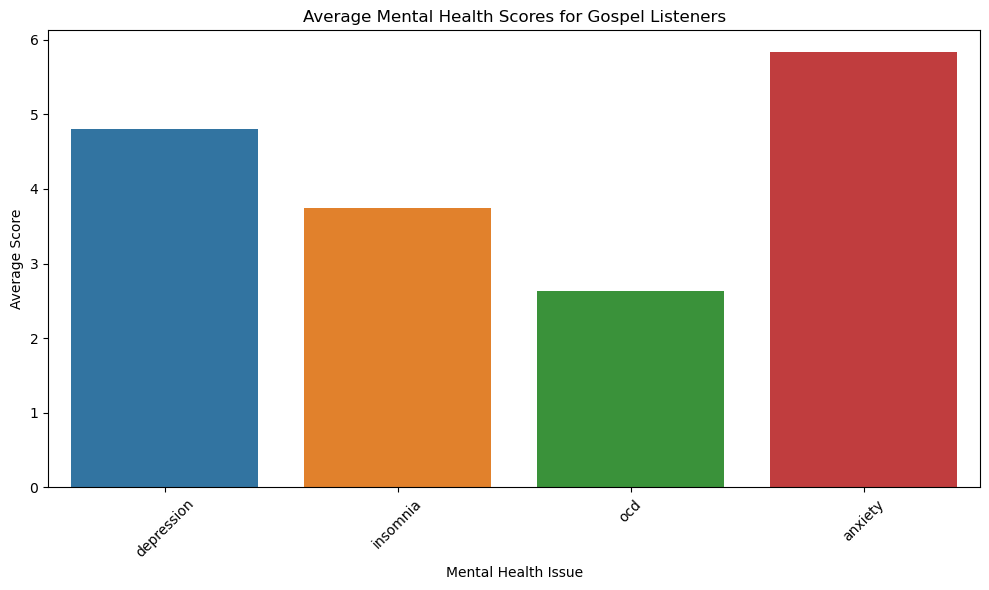

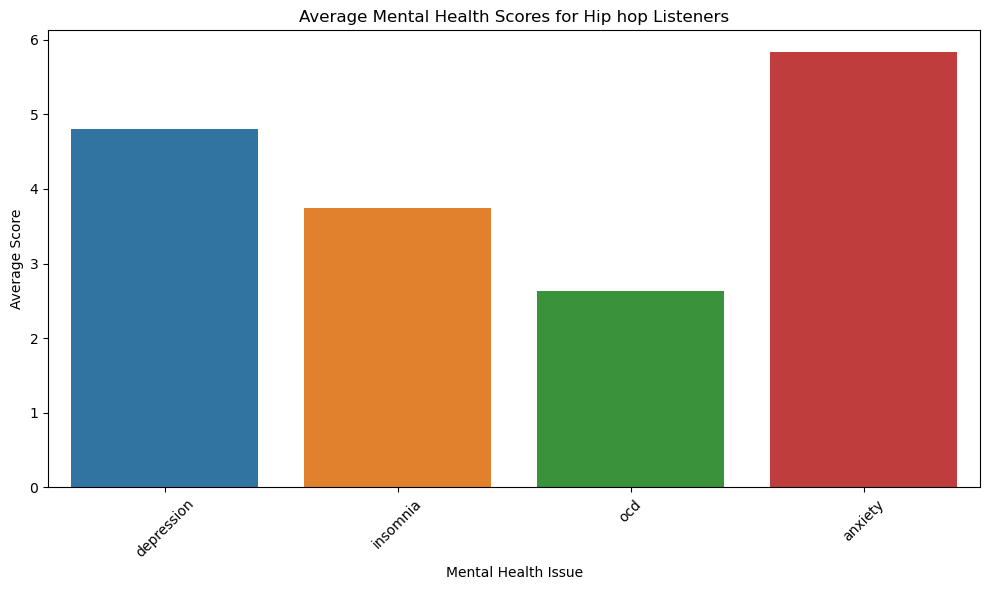

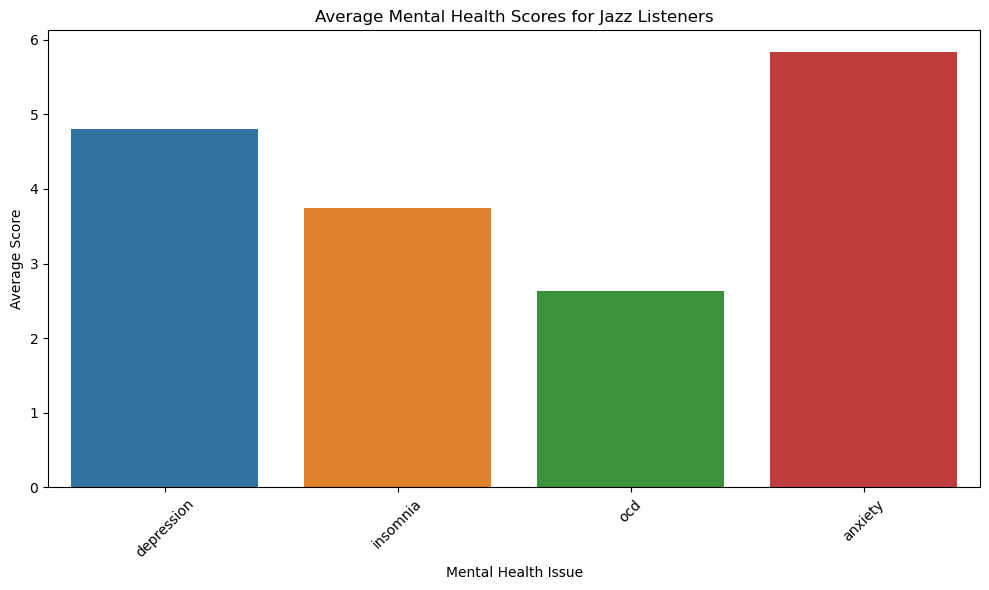

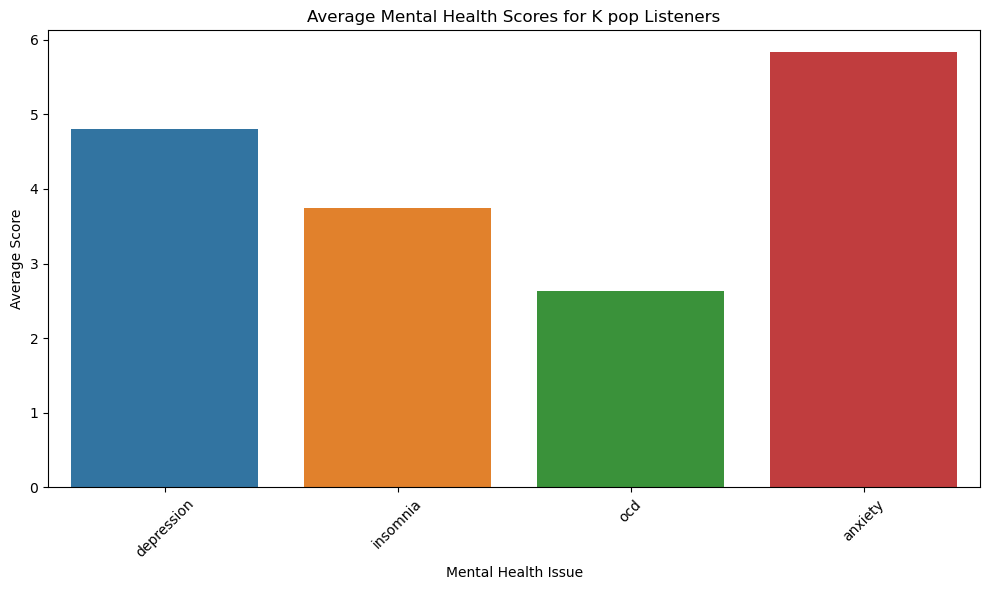

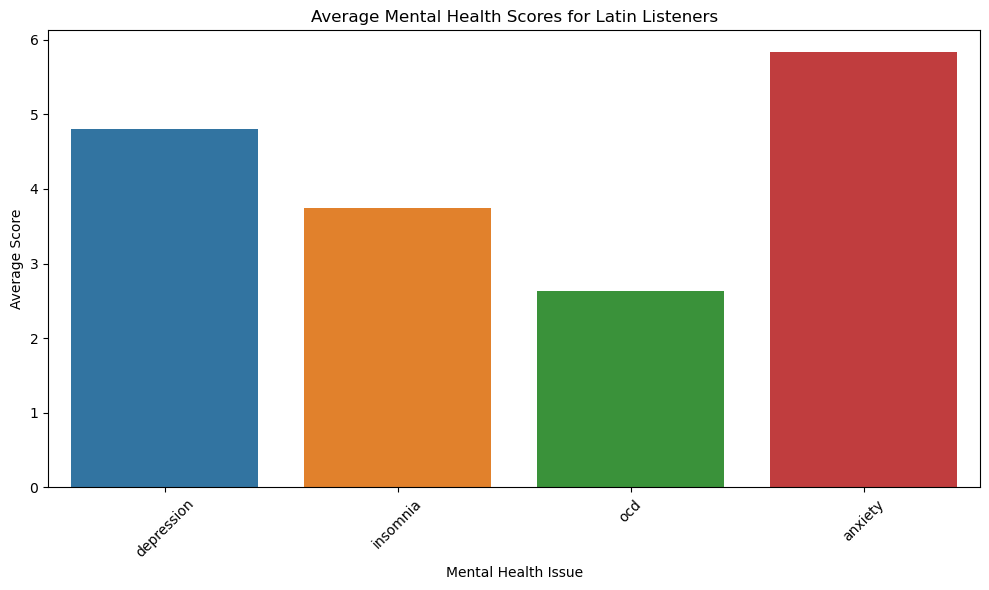

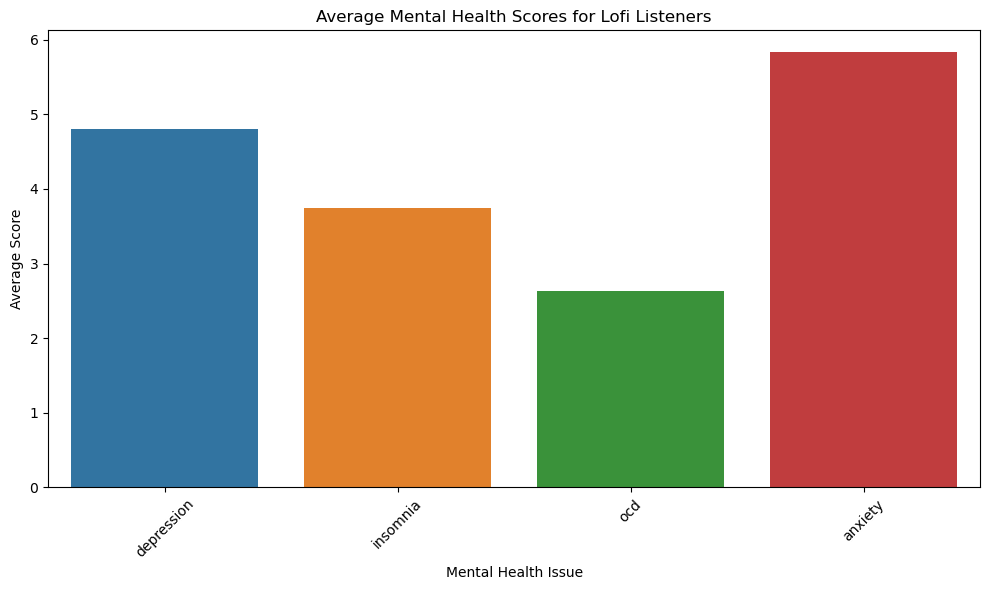

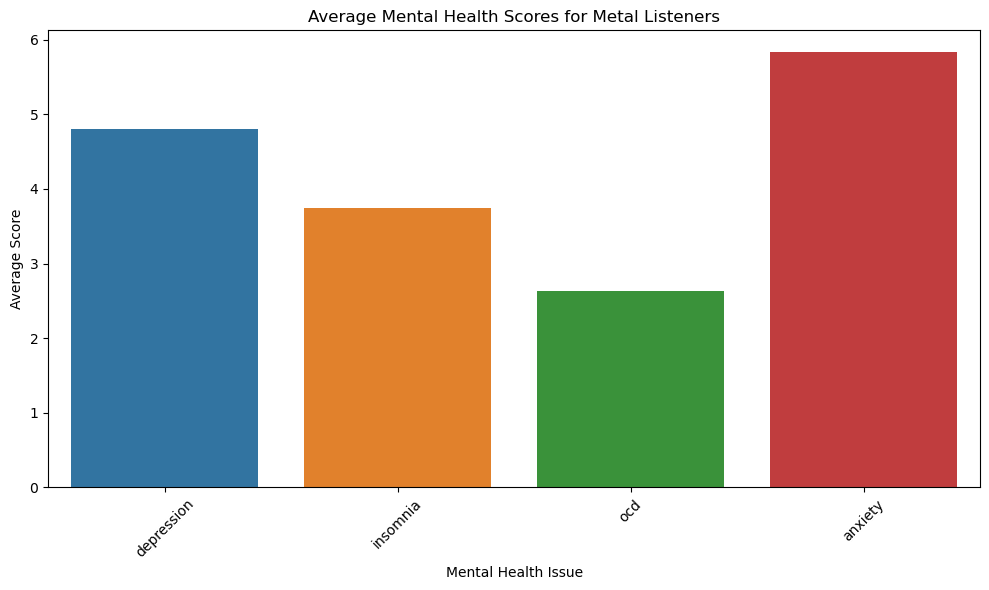

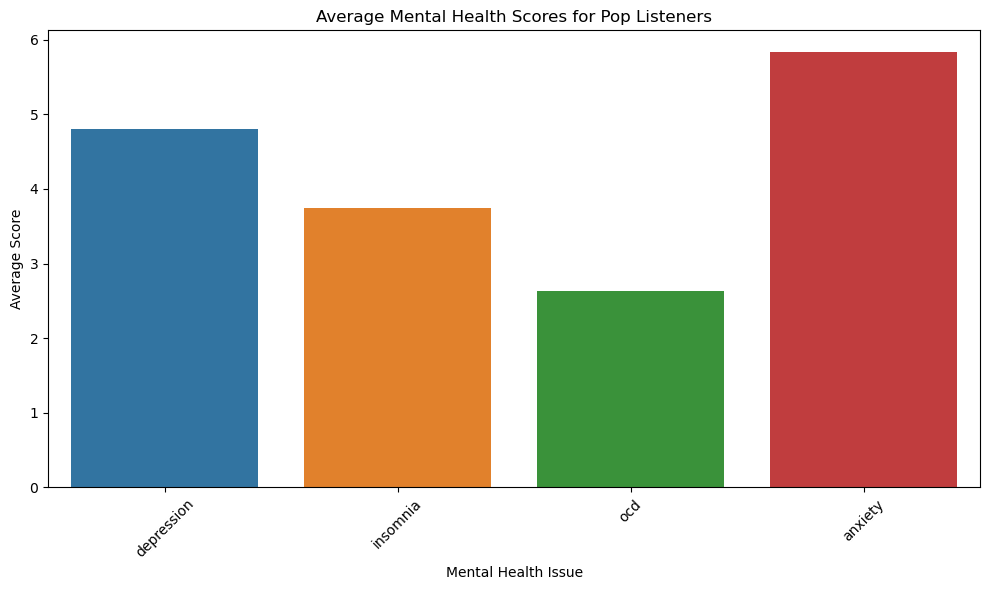

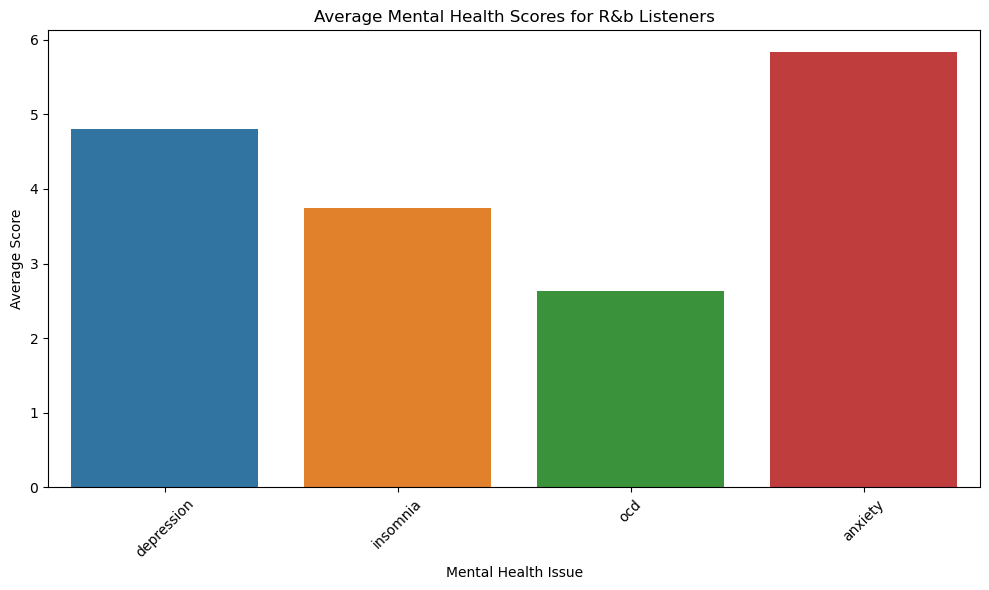

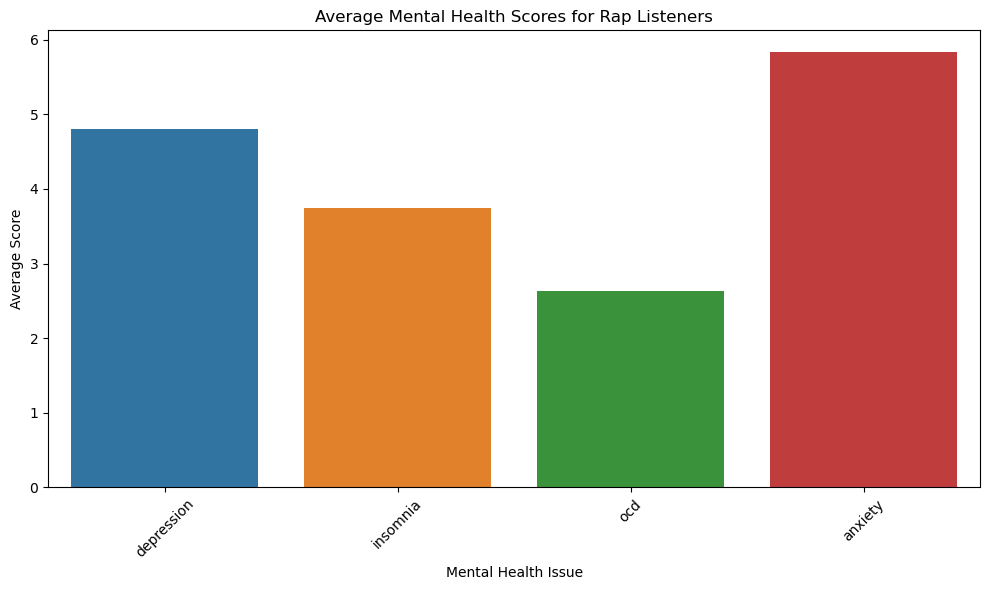

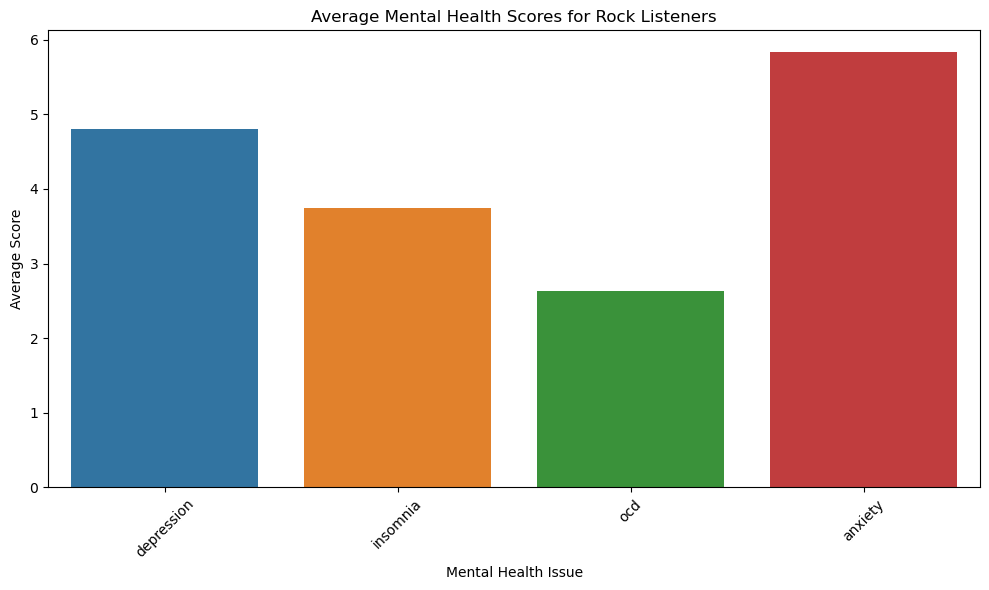

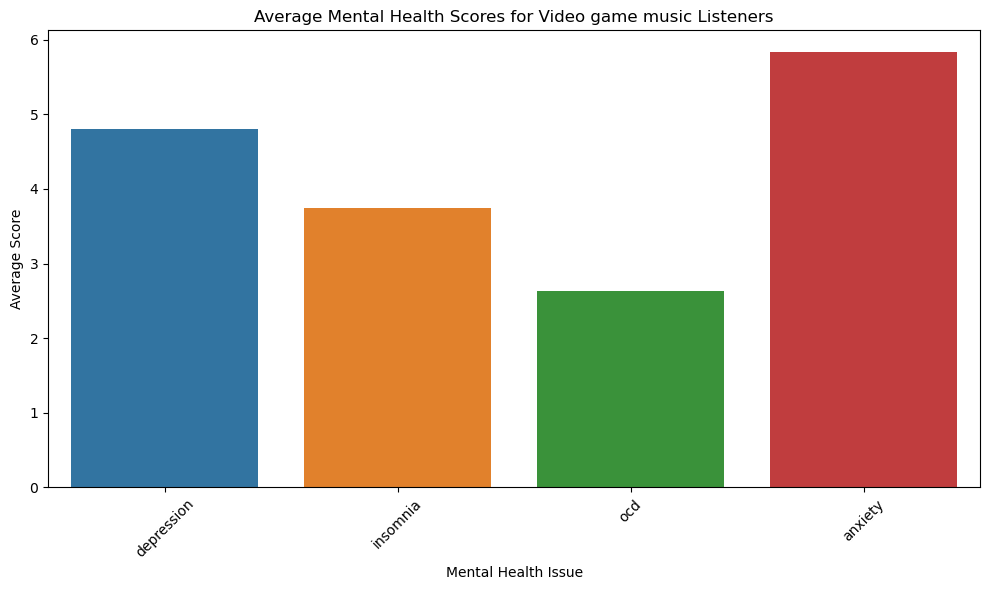

In [67]:
# Pivot aggregated_scores for plotting
# Assuming aggregated_scores is structured with 'music_preference', 'mental_health_issue', and 'average_score'
plot_data = aggregated_scores.melt(id_vars=['music_preference'], var_name='mental_health_issue', value_name='average_score')

# Plotting each music preference category separately
for pref in music_pref_columns:
    pref_data = plot_data[plot_data['music_preference'] == pref]
    
    plt.figure(figsize=(10, 6))

    # Convert 'freq_genre' to 'Genre' for the title
    title_genre = ' '.join(pref.replace('freq_', '').split('_')).capitalize()

    sns.barplot(x='mental_health_issue', y='average_score', data=pref_data)
    
    plt.xticks(rotation=45)  # Rotate the labels for clarity
    plt.xlabel('Mental Health Issue')
    plt.ylabel('Average Score')
    plt.title(f'Average Mental Health Scores for {title_genre} Listeners')
    
    plt.tight_layout()
    plt.show()

### 4. Correlation Analysis

##### 4.1 Correlation between numerical columns

In [68]:
# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

corr_matrix

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd
age,1.000000,-0.044638,-0.028209,-0.176662,-0.121563,0.006909,-0.130114
hours_per_day,-0.044638,1.000000,0.041766,0.049655,0.110404,0.141710,0.119319
bpm,-0.028209,0.041766,1.000000,-0.024249,0.039022,0.050909,0.017805
anxiety,-0.176662,0.049655,-0.024249,1.000000,0.521465,0.293858,0.346842
depression,-0.121563,0.110404,0.039022,0.521465,1.000000,0.378714,0.198595
insomnia,0.006909,0.141710,0.050909,0.293858,0.378714,1.000000,0.227947
ocd,-0.130114,0.119319,0.017805,0.346842,0.198595,0.227947,1.000000


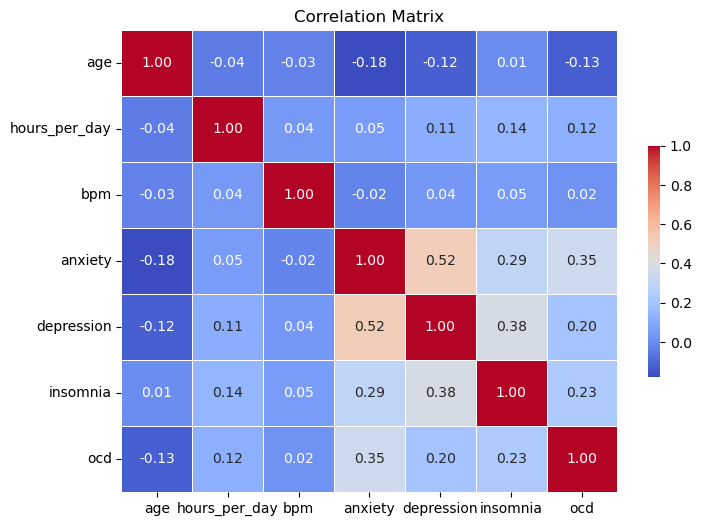

In [69]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix')
plt.show()

In [70]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

In [71]:
matrix = corr_matrix.unstack()
matrix[abs(matrix) >= 0.5]

age            age              1.000000
hours_per_day  hours_per_day    1.000000
bpm            bpm              1.000000
anxiety        anxiety          1.000000
               depression       0.521465
depression     anxiety          0.521465
               depression       1.000000
insomnia       insomnia         1.000000
ocd            ocd              1.000000
dtype: float64

<Axes: >

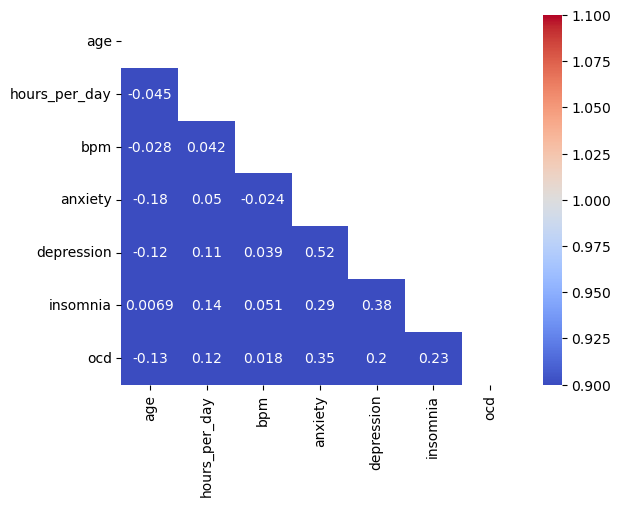

In [72]:
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=1, cmap='coolwarm', mask=mask)

-----------------------------------------------------------------------------------------------------
With the above correlation analysis between the numerical columns we can conclude that there is no big correlations between an individual's physical features/life habits (such as age, BPM and hours listening to music per day) and meantal health issues (such as anxiety, depression, insomnia and OCD).

For example, here's what we can conclude about the correlation between BPM and depression:

1 - Very Weak Relationship: Correlation coefficients range from -1 to +1, where values close to +1 or -1 indicate a strong linear relationship, and values close to 0 suggest a weak or no linear relationship. A coefficient of 0.04 is very close to 0, indicating that there is almost no linear relationship between 'bpm' and 'depression' based on your dataset.

2 - Lack of Predictive Power: With such a low correlation, 'bpm' would likely have minimal predictive power concerning 'depression' if used in a predictive model for linear regression analysis focusing on these variables.

3 - No Causation Implied: It's crucial to remember that correlation does not imply causation. Even if the correlation were stronger, it wouldn't necessarily mean that changes in 'bpm' cause changes in 'depression' levels or vice versa. Other factors could influence both variables.



------------------------------------------------------------------------------------------------------------
However there is a moderate positive relationship between the various mental health issues.

For example, here's what we can conclude about the correlation between anxiety and depression:

1  - Moderate Relationship: A correlation of 0.52 means there is a moderate degree of association between the two variables, with values of 'anxiety' tending to increase as 'depression' increases, and vice versa. This is indicative of a relationship where, as one variable goes up, the other tends to go up as well, but not as strongly or predictably as with a higher correlation.

2 - Predictive Insight: While not strong, this level of correlation suggests that 'anxiety' levels could have some predictive power regarding 'depression' levels within the dataset.

3 - No Causation: It's important to note that correlation does not imply causation. A correlation coefficient of 0.52 does not indicate that changes in 'anxiety' cause changes in 'depression' levels or vice versa. The observed correlation might be influenced by various other factors or underlying causes affecting both variables.

--------------------------------------------------------------------------------------------------------------

##### 4.2 Correlation between the Frequency of listening to certain music genres and mental health issues

In [73]:
df_copy = df_cleaned.copy()
df_copy

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_r&b,freq_rap,freq_rock,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects,permissions
0,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect,I understand.
1,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect,I understand.
2,18,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,19,Other,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [74]:
df_copy['freq_metal'].unique()

array(['Never', 'Sometimes', 'Rarely', 'Very frequently'], dtype=object)

In [75]:
df_copy['freq_classical'].unique()

array(['Rarely', 'Sometimes', 'Never', 'Very frequently'], dtype=object)

In [76]:
encoding_map = {'Never': 1, 'Sometimes': 2, 'Rarely': 3, 'Very frequently': 4}

In [77]:
# Assuming `df` is your DataFrame and `num_vars` is a list of your numerical variables
num_vars = ['depression', 'anxiety', 'insomnia', 'ocd']  # Example numerical columns

# Initialize an empty DataFrame to store correlation results
corr_results = pd.DataFrame()

for freq_col in freq_columns:
    # Encode the categorical data to numeric
    encoded_col_name = f'{freq_col}_encoded'
    df_copy[encoded_col_name] = df_copy[freq_col].map(encoding_map)

df_copy

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_jazz_encoded,freq_k_pop_encoded,freq_latin_encoded,freq_lofi_encoded,freq_metal_encoded,freq_pop_encoded,freq_r&b_encoded,freq_rap_encoded,freq_rock_encoded,freq_video_game_music_encoded
0,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,1,4,4,3,1,4,2,4,1,2
1,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,4,3,2,3,1,2,2,3,4,3
2,18,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,3,4,1,2,2,3,1,3,3,4
3,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,4,2,4,2,1,2,2,1,1,1
4,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,1,4,2,2,1,2,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,3,1,2,3,3,4,1,3,4,1
732,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,3,1,1,3,1,4,1,1,2,2
733,19,Other,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,3,3,3,2,3,2,2,2,3,3
734,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,3,1,1,1,1,1,1,1,1,2


In [79]:
# Example: Including only columns that start with 'F'
columns_to_include = [col for col in df_copy.columns 
                      if col.startswith('freq') and col.endswith('encoded')] \
                      + ['anxiety', 'depression', 'insomnia', 'ocd']

# Create the copy with the dynamically identified columns
df_encoded = df_copy[columns_to_include].copy()

df_encoded

,freq_classical_encoded,freq_country_encoded,freq_edm_encoded,freq_folk_encoded,freq_gospel_encoded,freq_hip_hop_encoded,freq_jazz_encoded,freq_k_pop_encoded,freq_latin_encoded,freq_lofi_encoded,freq_metal_encoded,freq_pop_encoded,freq_r&b_encoded,freq_rap_encoded,freq_rock_encoded,freq_video_game_music_encoded,anxiety,depression,insomnia,ocd
0,3,1,3,1,1,2,1,4,4,3,1,4,2,4,1,2,3.0,0.0,1.0,0.0
1,2,1,1,3,2,3,4,3,2,3,1,2,2,3,4,3,7.0,2.0,2.0,1.0
2,1,1,4,1,1,3,3,4,1,2,2,3,1,3,3,4,7.0,7.0,10.0,2.0
3,2,1,1,3,2,1,4,2,4,2,1,2,2,1,1,1,9.0,7.0,3.0,3.0
4,1,1,3,1,3,4,1,4,2,2,1,2,4,4,1,3,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,4,3,1,2,1,2,3,1,2,3,3,4,1,3,4,1,7.0,6.0,0.0,9.0
732,3,3,1,1,1,1,3,1,1,3,1,4,1,1,2,2,3.0,2.0,2.0,5.0
733,3,2,2,3,3,4,3,3,3,2,3,2,2,2,3,3,2.0,2.0,2.0,2.0
734,4,1,1,1,1,1,3,1,1,1,1,1,1,1,1,2,2.0,3.0,2.0,1.0


In [80]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

corr_matrix

,freq_classical_encoded,freq_country_encoded,freq_edm_encoded,freq_folk_encoded,freq_gospel_encoded,freq_hip_hop_encoded,freq_jazz_encoded,freq_k_pop_encoded,freq_latin_encoded,freq_lofi_encoded,freq_metal_encoded,freq_pop_encoded,freq_r&b_encoded,freq_rap_encoded,freq_rock_encoded,freq_video_game_music_encoded,anxiety,depression,insomnia,ocd
freq_classical_encoded,1.000000,-0.020542,-0.032383,0.113083,0.124211,-0.014494,0.211759,0.067736,0.172609,0.097047,-0.007947,0.010022,0.001966,-0.023693,-0.049759,0.122677,-0.063817,-0.029069,0.042614,-0.003624
freq_country_encoded,-0.020542,1.000000,0.004888,0.270533,0.274064,0.026004,0.079084,-0.024494,0.080863,-0.005705,0.136639,0.048148,0.048929,-0.003793,0.092057,0.020947,0.043164,0.011532,-0.011767,0.048200
freq_edm_encoded,-0.032383,0.004888,1.000000,-0.006597,0.105443,0.155925,0.099160,0.204020,0.095031,0.237280,0.070105,0.074280,0.144768,0.174456,0.068557,0.183650,0.067836,0.121503,0.084823,0.089197
freq_folk_encoded,0.113083,0.270533,-0.006597,1.000000,0.200143,0.018326,0.120096,-0.076299,0.154684,0.088985,0.199099,0.027049,0.061235,-0.019715,0.195979,0.102408,0.081695,0.088729,0.071506,0.027434
freq_gospel_encoded,0.124211,0.274064,0.105443,0.200143,1.000000,0.087811,0.142605,0.084696,0.172502,0.067988,-0.026892,-0.001501,0.147770,0.013940,-0.022689,0.039891,-0.006460,-0.004047,0.024901,0.047207
freq_hip_hop_encoded,-0.014494,0.026004,0.155925,0.018326,0.087811,1.000000,0.183207,0.234752,0.154076,0.211937,-0.040552,0.189652,0.370553,0.597280,0.042571,0.067862,0.051238,0.102707,0.072256,0.076465
freq_jazz_encoded,0.211759,0.079084,0.099160,0.120096,0.142605,0.183207,1.000000,0.084304,0.198800,0.211543,-0.025277,0.078359,0.221717,0.115884,0.092418,0.107452,-0.011929,0.018883,0.044064,-0.005969
freq_k_pop_encoded,0.067736,-0.024494,0.204020,-0.076299,0.084696,0.234752,0.084304,1.000000,0.281042,0.189887,-0.082919,0.215470,0.226752,0.211802,-0.077180,0.080515,0.048147,0.011712,-0.000316,0.018211
freq_latin_encoded,0.172609,0.080863,0.095031,0.154684,0.172502,0.154076,0.198800,0.281042,1.000000,0.178220,-0.000808,0.127544,0.222052,0.167180,0.026942,0.003139,-0.040022,0.022928,0.042366,-0.019169
freq_lofi_encoded,0.097047,-0.005705,0.237280,0.088985,0.067988,0.211937,0.211543,0.189887,0.178220,1.000000,0.031738,0.145795,0.160883,0.187322,0.056557,0.277656,0.012743,0.030505,0.064135,0.014584


In [92]:
# Select columns for correlation: those that start with 'freq' plus 'depression'
columns_to_include = [col for col in df_encoded.columns if col.startswith('freq')] + ['depression']

# Create a new DataFrame with only the selected columns
df_selected = df_encoded[columns_to_include]

In [94]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Focusing specifically on correlations of 'depression' with 'freq' columns
depression_corr = corr_matrix['depression'].drop('depression')

print(depression_corr)

freq_classical_encoded          -0.029069
freq_country_encoded             0.011532
freq_edm_encoded                 0.121503
freq_folk_encoded                0.088729
freq_gospel_encoded             -0.004047
freq_hip_hop_encoded             0.102707
freq_jazz_encoded                0.018883
freq_k_pop_encoded               0.011712
freq_latin_encoded               0.022928
freq_lofi_encoded                0.030505
freq_metal_encoded               0.158776
freq_pop_encoded                 0.078069
freq_r&b_encoded                 0.085722
freq_rap_encoded                 0.150450
freq_rock_encoded                0.146769
freq_video_game_music_encoded    0.038266
Name: depression, dtype: float64


---------------------------------------------------------------------------------------------------
The above print shows us the correlation between the frequency of listening each music genre and depression. 

Most of the relatioships are positve but not strong enough to indicate that as the frequency of listening to Rap, R&B, Rock, etc., increases, there is a tendency for the reported level of depression to also increase.

For music genres like classical and gospel: The negative sign of the correlation coefficient indicates that as the frequency of listening these music genres increases, there tends to be a decrease in the reported levels of depression or vice versa. However, this relationship is weak given the coefficient's closeness to 0.

--------------------------------------------------------------------------------------------------

In [95]:
# Select columns for correlation: those that start with 'freq' plus 'anxiety'
columns_to_include = [col for col in df_encoded.columns if col.startswith('freq')] + ['anxiety']

# Create a new DataFrame with only the selected columns
df_selected = df_encoded[columns_to_include]

In [96]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Focusing specifically on correlations of 'anxiety' with 'freq' columns
anxiety_corr = corr_matrix['anxiety'].drop('anxiety')

print(anxiety_corr)

freq_classical_encoded          -0.063817
freq_country_encoded             0.043164
freq_edm_encoded                 0.067836
freq_folk_encoded                0.081695
freq_gospel_encoded             -0.006460
freq_hip_hop_encoded             0.051238
freq_jazz_encoded               -0.011929
freq_k_pop_encoded               0.048147
freq_latin_encoded              -0.040022
freq_lofi_encoded                0.012743
freq_metal_encoded               0.043797
freq_pop_encoded                 0.077611
freq_r&b_encoded                 0.058004
freq_rap_encoded                 0.093526
freq_rock_encoded                0.063303
freq_video_game_music_encoded    0.059092
Name: anxiety, dtype: float64


---------------------------------------------------------------------------------------------------
The above print shows us the correlation between the frequency of listening each music genre and anxiety. 

Similarly to the depression correlation results, most of the relatioships are positve but not strong enough to indicate that as the frequency of listening to Rap, R&B, Rock, etc., increases, there is a tendency for the reported level of anxiety to also increase.

For music genres like classical, gospel, jazz and latin: The negative sign of the correlation coefficient indicates that as the frequency of listening these music genres increases, there tends to be a decrease in the reported levels of anxiety or vice versa. However, this relationship is weak given the coefficient's closeness to 0.

--------------------------------------------------------------------------------------------------

In [97]:
# Select columns for correlation: those that start with 'freq' plus 'insomnia'
columns_to_include = [col for col in df_encoded.columns if col.startswith('freq')] + ['insomnia']

# Create a new DataFrame with only the selected columns
df_selected = df_encoded[columns_to_include]

In [98]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Focusing specifically on correlations of 'insomnia' with 'freq' columns
insomnia_corr = corr_matrix['insomnia'].drop('insomnia')

print(insomnia_corr)

freq_classical_encoded           0.042614
freq_country_encoded            -0.011767
freq_edm_encoded                 0.084823
freq_folk_encoded                0.071506
freq_gospel_encoded              0.024901
freq_hip_hop_encoded             0.072256
freq_jazz_encoded                0.044064
freq_k_pop_encoded              -0.000316
freq_latin_encoded               0.042366
freq_lofi_encoded                0.064135
freq_metal_encoded               0.113672
freq_pop_encoded                -0.034321
freq_r&b_encoded                 0.049801
freq_rap_encoded                 0.079563
freq_rock_encoded                0.070670
freq_video_game_music_encoded    0.035404
Name: insomnia, dtype: float64


---------------------------------------------------------------------------------------------------
The above print shows us the correlation between the frequency of listening each music genre and insomnia. 

Similarly to the depression and anxiety correlation results, most of the relatioships are positve but not strong enough to indicate that as the frequency of listening to Rap, R&B, Rock, etc., increases, there is a tendency for the reported level of insomnia to also increase.

For music genres like country, k_pop and pop: The negative sign of the correlation coefficient indicates that as the frequency of listening these music genres increases, there tends to be a decrease in the reported levels of insomnia or vice versa. However, this relationship is weak given the coefficient's closeness to 0.

--------------------------------------------------------------------------------------------------

In [99]:
# Select columns for correlation: those that start with 'freq' plus 'ocd'
columns_to_include = [col for col in df_encoded.columns if col.startswith('freq')] + ['ocd']

# Create a new DataFrame with only the selected columns
df_selected = df_encoded[columns_to_include]

In [100]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Focusing specifically on correlations of 'ocd' with 'freq' columns
ocd_corr = corr_matrix['ocd'].drop('ocd')

print(ocd_corr)

freq_classical_encoded          -0.003624
freq_country_encoded             0.048200
freq_edm_encoded                 0.089197
freq_folk_encoded                0.027434
freq_gospel_encoded              0.047207
freq_hip_hop_encoded             0.076465
freq_jazz_encoded               -0.005969
freq_k_pop_encoded               0.018211
freq_latin_encoded              -0.019169
freq_lofi_encoded                0.014584
freq_metal_encoded               0.011040
freq_pop_encoded                 0.060085
freq_r&b_encoded                 0.106092
freq_rap_encoded                 0.075086
freq_rock_encoded                0.031232
freq_video_game_music_encoded    0.022443
Name: ocd, dtype: float64


---------------------------------------------------------------------------------------------------
The above print shows us the correlation between the frequency of listening each music genre and OCD. 

Similarly to the other mental health issue correlation results, most of the relatioships are positve but not strong enough to indicate that as the frequency of listening to Rap, R&B, Rock, etc., increases, there is a tendency for the reported level of OCD to also increase.

For music genres like classical, jazz and latin: The negative sign of the correlation coefficient indicates that as the frequency of listening these music genres increases, there tends to be a decrease in the reported levels of OCD or vice versa. However, this relationship is weak given the coefficient's closeness to 0.

--------------------------------------------------------------------------------------------------

##### 4.3 Correlation between Favorite music genre and mental health issues

In [112]:
# Select columns for correlation: those that start with 'freq' plus 'insomnia'
columns_to_include = ['fav_genre', 'anxiety', 'depression', 'insomnia', 'ocd']

# Create a new DataFrame with only the selected columns
df_selected = df_copy[columns_to_include].copy()
df_selected

,fav_genre,anxiety,depression,insomnia,ocd
0,Latin,3.0,0.0,1.0,0.0
1,Rock,7.0,2.0,2.0,1.0
2,Video game music,7.0,7.0,10.0,2.0
3,Jazz,9.0,7.0,3.0,3.0
4,R&B,7.0,2.0,5.0,9.0
...,...,...,...,...,...
731,Rock,7.0,6.0,0.0,9.0
732,Pop,3.0,2.0,2.0,5.0
733,Rap,2.0,2.0,2.0,2.0
734,Classical,2.0,3.0,2.0,1.0


In [113]:
# Encoding column 'fav_genre'
one_hot_encoded_df = pd.get_dummies(df_selected, columns=['fav_genre'])


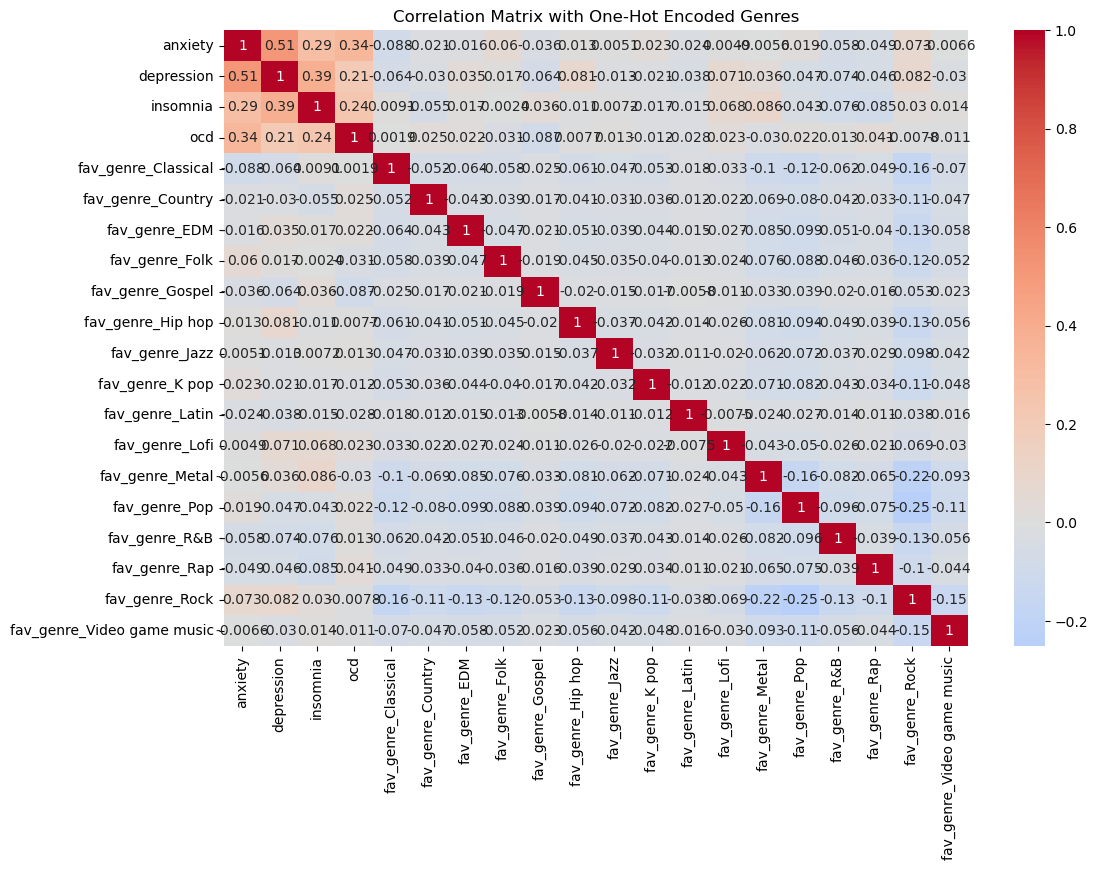

In [115]:
# Calculate correlation matrix including one-hot encoded genre columns and specified numerical variables
corr_matrix = one_hot_encoded_df.corr(method='spearman')

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix with One-Hot Encoded Genres')
plt.show()

In [116]:
# Select columns for correlation: those that start with 'freq' plus 'anxiety'
columns_to_include = [col for col in one_hot_encoded_df.columns if col.startswith('fav')] + ['anxiety']

# Create a new DataFrame with only the selected columns
df_selected = one_hot_encoded_df[columns_to_include]

In [117]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Focusing specifically on correlations of 'anxiety' with 'fav_genre' columns
anxiety_corr = corr_matrix['anxiety'].drop('anxiety')

print(anxiety_corr)

fav_genre_Classical          -0.094555
fav_genre_Country            -0.029138
fav_genre_EDM                -0.028616
fav_genre_Folk                0.054209
fav_genre_Gospel             -0.032510
fav_genre_Hip hop             0.022438
fav_genre_Jazz                0.003995
fav_genre_K pop               0.027273
fav_genre_Latin              -0.034411
fav_genre_Lofi                0.011223
fav_genre_Metal              -0.009511
fav_genre_Pop                 0.037037
fav_genre_R&B                -0.053037
fav_genre_Rap                -0.046732
fav_genre_Rock                0.060715
fav_genre_Video game music    0.004795
Name: anxiety, dtype: float64


--------------------------------------------------------------------------------------------------
The above results indicate: 
- Weak Inverse Relationship: The negative sign of the correlation coefficient suggests that as preference for gospel, classical, country, latin, metal music, etc. increases (from 0 to 1), anxiety levels slightly decrease. However, the magnitude of the correlation is very close to 0, emphasizing that any such relationship is extremely weak.

- Limited Predictive Power: Given the correlation's proximity to 0, preference for these music genres has minimal, if any, predictive power regarding an individual's anxiety score. It implies that knowing whether someone prefers gospel music, for example, does little to predict their depression level accurately based on this dataset.

-------------------------------------------------------------------------------------------------

In [118]:
# Select columns for correlation: those that start with 'freq' plus 'depression'
columns_to_include = [col for col in one_hot_encoded_df.columns if col.startswith('fav')] + ['depression']

# Create a new DataFrame with only the selected columns
df_selected = one_hot_encoded_df[columns_to_include]

In [119]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Focusing specifically on correlations of 'depression' with 'fav_genre' columns
depression_corr = corr_matrix['depression'].drop('depression')

print(depression_corr)

fav_genre_Classical          -0.066575
fav_genre_Country            -0.029660
fav_genre_EDM                 0.033804
fav_genre_Folk                0.018259
fav_genre_Gospel             -0.063873
fav_genre_Hip hop             0.078817
fav_genre_Jazz               -0.016494
fav_genre_K pop              -0.023750
fav_genre_Latin              -0.038025
fav_genre_Lofi                0.069864
fav_genre_Metal               0.032828
fav_genre_Pop                -0.044117
fav_genre_R&B                -0.071633
fav_genre_Rap                -0.046328
fav_genre_Rock                0.084810
fav_genre_Video game music   -0.026780
Name: depression, dtype: float64


-----------------------------------------------------------------------------
Similarly to the anxiety correlation results, the depression results indicate weak inverse relationship and limited predictive power.

-----------------------------------------------------------------------------

In [120]:
# Select columns for correlation: those that start with 'freq' plus 'insomnia'
columns_to_include = [col for col in one_hot_encoded_df.columns if col.startswith('fav')] + ['insomnia']

# Create a new DataFrame with only the selected columns
df_selected = one_hot_encoded_df[columns_to_include]

In [121]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Focusing specifically on correlations of 'insomnia' with 'fav_genre' columns
depression_corr = corr_matrix['insomnia'].drop('insomnia')

print(depression_corr)

fav_genre_Classical           0.004661
fav_genre_Country            -0.062031
fav_genre_EDM                 0.017309
fav_genre_Folk               -0.007180
fav_genre_Gospel              0.046786
fav_genre_Hip hop            -0.019272
fav_genre_Jazz                0.005913
fav_genre_K pop              -0.017319
fav_genre_Latin              -0.008448
fav_genre_Lofi                0.070709
fav_genre_Metal               0.097454
fav_genre_Pop                -0.051669
fav_genre_R&B                -0.061919
fav_genre_Rap                -0.083510
fav_genre_Rock                0.026484
fav_genre_Video game music    0.021179
Name: insomnia, dtype: float64


-----------------------------------------------------------
Again, we're looking at weak inverse relationship and limited predictive power.

----------------------------------------------------------

In [122]:
# Select columns for correlation: those that start with 'freq' plus 'ocd'
columns_to_include = [col for col in one_hot_encoded_df.columns if col.startswith('fav')] + ['ocd']

# Create a new DataFrame with only the selected columns
df_selected = one_hot_encoded_df[columns_to_include]

In [123]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Focusing specifically on correlations of 'insomnia' with 'fav_genre' columns
depression_corr = corr_matrix['ocd'].drop('ocd')

print(depression_corr)

fav_genre_Classical          -0.024948
fav_genre_Country             0.008512
fav_genre_EDM                 0.029918
fav_genre_Folk               -0.031355
fav_genre_Gospel             -0.073473
fav_genre_Hip hop            -0.003342
fav_genre_Jazz                0.009944
fav_genre_K pop              -0.006265
fav_genre_Latin              -0.021764
fav_genre_Lofi                0.031817
fav_genre_Metal              -0.030358
fav_genre_Pop                 0.033820
fav_genre_R&B                 0.008792
fav_genre_Rap                 0.034081
fav_genre_Rock                0.009690
fav_genre_Video game music   -0.021782
Name: ocd, dtype: float64


-----------------------------------------------------------
Again, we're looking at weak inverse relationship and limited predictive power.

----------------------------------------------------------

##### 4.4 Correlation between Favorite music genre and Music Effects

In [124]:
import scipy.stats as stats

# Creating a crosstable with columns 'fav_genre' and 'music_effects'
contingency_table = pd.crosstab(df_copy['fav_genre'], df_copy['music_effects'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}, P-value: {p}")

Chi-square Statistic: 37.908148254830294, P-value: 0.15212214397935545


-----------------------------------------------------------------------------------------------------------------------
Since the p-value is 0.152, which is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis at the conventional 5% significance level. This means we haven’t found statistically significant evidence of an association between favorite music genre and music effects, based on our data.

-----------------------------------------------------------------------------------------------------------------------------------------